# Finding the Factors that Influence the Price of a Vehicle

# Contents <a id='back'></a>
* [1. Introduction](#intro)
* [2. Data Exploration](#data_exploration)
* [3. Data Cleaning](#data_cleaning)
    * [Finding and Analysing Missing Values](#find_missing_values)
    * [Fixing Data Types](#fix_data_types)
    * [Enrichment of Data](#enrich_data)    
* [4. Exploratory Data Analysis](#eda)
    * [Categorical Variables](#categorical_eda)
    * [Numerical Variables](#numerical_eda)
    * [Lifetime of Advertisements](#lifetime_of_ads)
    * [Average Price for Each Type of Vehicle](#avg_price)
* [5. Hypothesis Testing](#hypothesis_testing)
    * [Hypothesis 1](#hypothesis_1)
    * [Hypothesis 2](#hypothesis_2)
* [6. General Conclusion](#general_conclusion)

## 1. Introduction <a id='intro'></a>

This project is to perform an analysis for Crankshaft List to find which factors affecting the price of a vehicle. Hundreds of free advertisements for vechicles are published on Crankshaft List website everyday, this project will analyse the data collected over the last few years and determine which factors have impacts on the price of a vehicle.

### Purpose
This project aims to answer the following questions:

1. Among the categorical variables (number of cylinders, condition, paint colour and transmission type), which of them will influence the price of a vehicle?
2. Is there any correlation between the numerical variable (odometer value and vehicle's age) and the price of a vehicle?

### Hypothesis
To answer the questions above, the following hypotheses are formulated:

1. The condition of a vehicle and the transmission type are the categorical factors which influence the price of a vehicle.
2. Both the odometer value and the vehicle's age are correlated with the price of a vehicle and there is a strong negative correlations between each of these two variables and the price.

[Back to Contents](#back)

## 2. Data Exploration <a id='data_exploration'></a>

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data as a DataFrame
try:
    df = pd.read_csv('vehicles_us.csv')
except:
    df = pd.read_csv('/datasets/vehicles_us.csv')

In [3]:
# Check how does the dataset looks like
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


There are 51525 vehicles and 13 columns of relevant information

According to the documentation:

**Description of the data**
- `price` - price of the vehicle
- `model_year` - model year of the vehicle
- `model` - model of the vehicle
- `condition` - condition of the vehicle
- `cylinders` - number of cylinders of the vehicle
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission` - auto, manual, etc.
- `paint_color` - colour of the vehicle
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

In [4]:
# Check the number of missing values
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [5]:
# Get the general information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


**Issues and solutions**
- There are a lot of missing values in `model_year`, `cylinders`, `odometer`, `paint_color` and `is_4wd`, we have to investigate the reason of these missing values before we can decide if we should and how to fill them.
- `date_posted` has the wrong data type, it will be changed to `datetime`.
- `model_year`, `cylinders`, `odometer`, `is_4wd` should have `int64` as the data type.

In [6]:
# Look at the statictics of the numerical columns
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


No negative values in all the numerical columns but the minimum values of the `price` and the `model_year` look suspicious.
**Issue**
- `price` has a minimum value of 1 is highly unlikely since it is definitely a huge loss for the seller.
- `model_year` has a minimum value of 1908 is possible but it is unlikely for someone to sell it since these 'antique car' usually are for the collection of the car lovers.

**Conclusion:**

From the overview of the data, the dataset has the `price`, `condition`, `cylinders`, `odometer`, `transmission`, `paint_color` and `date_posted` columns which will be used to test the hypotheses. Other columns are good to provide extra information in the analysis process. However, there are 

**Issues need to be addressed later**
- `price` and `model_year` have unusual a minimum values.
- `model_year`, `cylinders`, `odometer`, `paint_color` and `is_4wd` columns have a large amount of missing values.
- `date_posted` is not in the data type of `datetime`.
- `model_year`, `cylinders`, `odometer`, `is_4wd` should have `int64` as the data type.

[Back to Contents](#back)

## 3. Data Cleaning <a id='data_cleaning'></a>

### Finding and Analysing Missing Values <a id='find_missing_values'></a>

In [7]:
# Check for duplicates
df.duplicated().sum()

0

No duplicates. Let's start to analyse the missing values.

In [8]:
# Count the missing values in each column
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

There are five columns contain missing values, namely `model_year`, `cylinders`, `odometer`, `paint_color` and `is_4wd`. Each column of missing values will be addresed separately
1. First we will create a dataframe containing the rows with missing values in a specific column. 
2. Then, The distribution of the whole dataset will be compared with the distribution of the data of missing values to check if the missing values show any pattern. 
    - For the numerical columns, the distribution will be checked by using `describe()`
    - For the categorical columns, a table will be created to compare the percentage distribtion. Since we will check for five columns of missing values, a function will be created to automate the task.
3. If the distribution of the missing values has no pattern, we will determine which factor has impact on the missing values and fill the missing values based on the factor.

In [9]:
# Create a list to contains the possible categorical factor for missing values except model
na_categorical_factor = ['condition', 'cylinders', 'fuel', 'transmission', 'type', 'paint_color', 'model']

In [10]:
# Create a function to check the distribution of data based on categorical factor by using table
def check_na_category_distr(check_column, factors = na_categorical_factor):
    """
    This function compare the distribution of data of the original dataframe 
    with that of the dataframe with missing values in a specific column    
    """
    # Create the dataframe with the specific missing values
    na_df = df[df[check_column].isna()]
    
    # Exclude the comparison with the check_column itself
    if check_column in factors:
        factors.remove(check_column)
    else:
        pass
    
    for factor in factors:        
        # Find the distribution of the original df and the na df 
        original_df_distr = df[factor].value_counts(normalize = True)
        na_df_distr = na_df[factor].value_counts(normalize = True)        
        
        # Create a dataframe to compare the distribution           
        compare_df = pd.DataFrame({
            'distribution in original df': original_df_distr,
            f'distribution in {check_column} na df': na_df_distr
        }).reset_index()
        
        # Modify the compare_df to have a better visualisation 
        compare_df.rename(columns={'index': factor}, inplace=True)
        compare_df.sort_values(by='distribution in original df', ascending=False, inplace=True)
        compare_df.index = range(len(compare_df))
            
        # Show the compare_df
        display(compare_df.head(10))
        print('-'*100)

**`is_4wd` column**

In [11]:
# Create a dataframe containing the rows with missing values in is_4wd column
is_4wd_na_df = df[df['is_4wd'].isna()]

# Find the percentage of missing values in the is_4wd column
print(f'The percentage of missing values in the is_4wd column: {len(is_4wd_na_df) / len(df):.2%}')

The percentage of missing values in the is_4wd column: 50.37%


50.37% of missing values! Let's check on the distribution of the data as stated above.

In [12]:
# Compare the distribution of data in df and is_4wd_na_df based on the numerical columns
print('df')
display(df.describe())
print('-'*100)
print('is_4wd_na_df')
display(is_4wd_na_df.describe())

df


,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


----------------------------------------------------------------------------------------------------
is_4wd_na_df


,price,model_year,cylinders,odometer,is_4wd,days_listed
count,25953.000000,24142.000000,23272.000000,21937.000000,0.0,25953.000000
mean,8991.499904,2009.480076,5.455569,113205.722524,NaN,39.498671
std,7477.993220,6.724156,1.563326,64710.032546,NaN,28.324809
min,1.000000,1908.000000,3.000000,0.000000,NaN,0.000000
25%,4400.000000,2006.000000,4.000000,68322.000000,NaN,19.000000
50%,6995.000000,2011.000000,6.000000,110000.000000,NaN,33.000000
75%,11800.000000,2014.000000,6.000000,152000.000000,NaN,53.000000
max,189000.000000,2019.000000,10.000000,990000.000000,NaN,271.000000


In the table of `df`, both the minimum and the maximum values are `1`, this implies that the whole `is_4wd` column contains only two values - `1` and `NaN`. We can further comfirm this by counting each type of value.

In [13]:
# Count the unique values in is_4wd column
df['is_4wd'].value_counts(dropna = False)

NaN    25953
1.0    25572
Name: is_4wd, dtype: int64

In the `is_4wd` column, there are 25953 of missing values and 25572 of `1`. In this case, we can infer that all the missing values are actually `0`. As a result, we will not use the `is_4wd` value of the corresponding `model` to fill the missing values but simply fill them with `0`.

In [14]:
# Fill the missing values in is_4wd column with 0
df['is_4wd'] = df['is_4wd'].fillna(0)

# Check if all the missing values are filled
df.isna().sum()

price              0
model_year      3619
model              0
condition          0
cylinders       5260
fuel               0
odometer        7892
transmission       0
type               0
paint_color     9267
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

All the missing values in the `is_4wd` column are filled.

**`cylinders` column**

In [15]:
# Create a dataframe containing the rows with missing values in cylinders column
cylinders_na_df = df[df['cylinders'].isna()]

# Find the percentage of missing values in the cylinders column
print(f'The percentage of missing values in the cylinders column: {len(cylinders_na_df) / len(df):.2%}')

The percentage of missing values in the cylinders column: 10.21%


In [16]:
# Compare the distribution of data in df and cylinders_na_df based on the numerical columns
print('df')
display(df.describe())
print('-'*100)
print('cylinders_na_df')
display(cylinders_na_df.describe())

df


,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,51525.000000,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,0.496303,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.499991,28.20427
min,1.000000,1908.000000,3.000000,0.000000,0.000000,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,0.000000,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,0.000000,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.000000,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.000000,271.00000


----------------------------------------------------------------------------------------------------
cylinders_na_df


,price,model_year,cylinders,odometer,is_4wd,days_listed
count,5260.000000,4897.000000,0.0,4448.000000,5260.000000,5260.000000
mean,12036.746008,2009.657341,NaN,116617.246853,0.490304,39.443346
std,10494.707681,6.420406,NaN,66302.857772,0.499954,28.415894
min,1.000000,1949.000000,NaN,0.000000,0.000000,0.000000
25%,5000.000000,2006.000000,NaN,71719.250000,0.000000,19.000000
50%,8997.000000,2011.000000,NaN,113537.500000,0.000000,33.000000
75%,16254.250000,2014.000000,NaN,155000.000000,1.000000,53.000000
max,300000.000000,2019.000000,NaN,990000.000000,1.000000,228.000000


The distribution of data of the numerical columns in the `df` and `cylinders_na_df` are similar, this result shows that the missingness has no pattern in these columns. Next, we will check on the categorical columns.

In [17]:
# Compare the distribution of data in df and cylinders_na_df based on the categorical columns
check_na_category_distr('cylinders')

,condition,distribution in original df,distribution in cylinders na df
0,excellent,0.480796,0.494106
1,good,0.390975,0.382319
2,like new,0.092033,0.090494
3,fair,0.031189,0.028897
4,new,0.002775,0.002281
5,salvage,0.002232,0.001901


----------------------------------------------------------------------------------------------------


,fuel,distribution in original df,distribution in cylinders na df
0,gas,0.917768,0.917490
1,diesel,0.072082,0.071863
2,hybrid,0.007938,0.007414
3,other,0.002096,0.002852
4,electric,0.000116,0.000380


----------------------------------------------------------------------------------------------------


,transmission,distribution in original df,distribution in cylinders na df
0,automatic,0.910277,0.909125
1,manual,0.054905,0.058175
2,other,0.034818,0.032700


----------------------------------------------------------------------------------------------------


,type,distribution in original df,distribution in cylinders na df
0,SUV,0.240757,0.232700
1,truck,0.239748,0.240494
2,sedan,0.235885,0.238783
3,pickup,0.135623,0.135741
4,coupe,0.044697,0.042205
5,wagon,0.029908,0.031179
6,mini-van,0.022533,0.024144
7,hatchback,0.020320,0.024715
8,van,0.012285,0.012357
9,convertible,0.008656,0.006844


----------------------------------------------------------------------------------------------------


,paint_color,distribution in original df,distribution in cylinders na df
0,white,0.237328,0.227146
1,black,0.182025,0.180974
2,silver,0.147759,0.157773
3,grey,0.119196,0.116937
4,blue,0.105897,0.105104
5,red,0.104619,0.104872
6,green,0.033035,0.033875
7,brown,0.028941,0.032251
8,custom,0.027285,0.025290
9,yellow,0.006034,0.007193


----------------------------------------------------------------------------------------------------


,model,distribution in original df,distribution in cylinders na df
0,ford f-150,0.054265,0.060076
1,chevrolet silverado 1500,0.042135,0.043916
2,ram 1500,0.033964,0.035171
3,chevrolet silverado,0.024668,0.026046
4,jeep wrangler,0.021718,0.021293
5,ram 2500,0.021174,0.023194
6,toyota camry,0.019214,0.017490
7,honda accord,0.018709,0.016730
8,chevrolet silverado 2500hd,0.017758,0.016350
9,gmc sierra 1500,0.017584,0.015970


----------------------------------------------------------------------------------------------------


These table shows that the distribution of the categorical columns in the `df` and `cylinders_na_df` are also similar, therefore we conclude that the missingess indeed has no pattern.

Now, we have to find the possible variables which affect the value of `cylinders`. It is likely that the `cylinders` number depends on the `model` of a vehicle. Since `cylinders` is a categorical variable, the number of `cylinders` with the most count (i.e. the mode) for each model will be used to fill in the missing values.

However, we have to investigate the abnormal minimum value in the `model_year` first since it is related to the variable `model`. We will first plot a histogram to locate abnormal values.

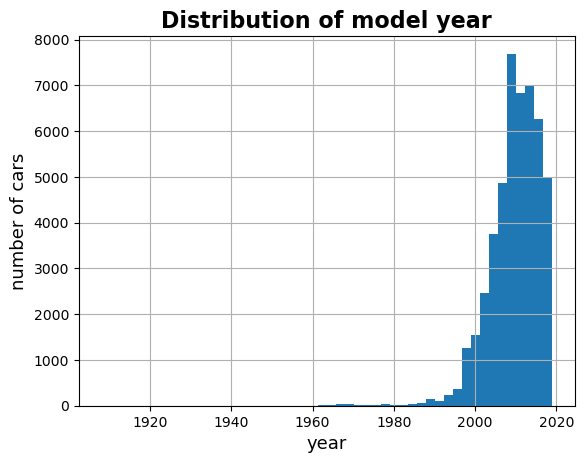

In [18]:
# Plot a histogram to check for the abnormal values in model_year
df.hist(column = 'model_year', bins = 50)

plt.title('Distribution of model year', fontsize = 16, fontweight = 'bold')
plt.xlabel('year', fontsize = 13)
plt.ylabel('number of cars', fontsize = 13)

plt.show()

It can be seen that there are a tiny numbers of cars with `model_year` less than 1960. We will have a check on these cars.

In [19]:
df.isna().sum()

price              0
model_year      3619
model              0
condition          0
cylinders       5260
fuel               0
odometer        7892
transmission       0
type               0
paint_color     9267
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

In [20]:
# Check the cars with model_year less than or equal to 1960
df.query('model_year <= 1960')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
10018,23900,1955.0,ford f250,excellent,6.0,gas,47180.0,manual,truck,blue,0.0,2018-12-22,61
14752,15000,1954.0,ford f-150,excellent,NaN,gas,3565.0,manual,pickup,black,0.0,2019-02-16,13
22595,21000,1948.0,chevrolet impala,like new,8.0,gas,4000.0,automatic,sedan,red,0.0,2019-01-18,24
28009,65000,1960.0,chevrolet corvette,like new,8.0,gas,NaN,manual,coupe,NaN,0.0,2018-11-03,41
33007,17500,1960.0,chevrolet impala,excellent,8.0,gas,31000.0,automatic,sedan,white,0.0,2019-02-01,11
33906,12995,1908.0,gmc yukon,good,8.0,gas,169328.0,automatic,SUV,black,0.0,2018-07-06,34
33907,12995,1908.0,cadillac escalade,excellent,8.0,gas,NaN,automatic,SUV,white,0.0,2018-06-24,25
34713,5000,1936.0,ford f-150,excellent,6.0,gas,30000.0,manual,pickup,purple,0.0,2018-11-22,10
36582,44900,1949.0,chevrolet suburban,good,NaN,gas,1800.0,automatic,wagon,orange,0.0,2018-08-19,10
39580,35000,1958.0,chevrolet impala,excellent,8.0,gas,3184.0,automatic,coupe,black,0.0,2018-05-19,33


From the online sources, the first launch year of these cars are later than the `model_year` shown in the table. To fix these anomalies, we will use the most count value of `model_year` from the same model to replace them. If there are more than one most count value, the first value will be used.

In [21]:
# Replace the anomalies in model_year with the 
df.loc[df.query('model_year <= 1960').index, 'model_year'] = (
    df.groupby('model')['model_year'].transform(lambda year: year.mode().iloc[0])
)

In [22]:
# Check if the anomalies are fixed
df.query('model_year <= 1960')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


All the anomalies have been replaced with reasonable values. We will further check if there is any anomaly between 1960 and 1970.

In [23]:
# Check for some rows of model_year between 1960 and 1970
df.query('1960 < model_year < 1970')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,0.0,2019-01-23,17
1587,51000,1967.0,chevrolet corvette,excellent,8.0,gas,66000.0,manual,coupe,blue,0.0,2019-02-14,95
2049,30000,1969.0,chevrolet corvette,excellent,8.0,other,0.0,automatic,convertible,white,0.0,2018-08-01,20
2061,32900,1967.0,chevrolet camaro,good,8.0,gas,10000.0,manual,convertible,NaN,0.0,2019-01-23,33
2834,49000,1965.0,ford mustang,excellent,8.0,gas,5160.0,manual,other,red,0.0,2019-02-27,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44332,22500,1965.0,ford mustang,excellent,8.0,gas,250.0,manual,coupe,red,0.0,2018-06-16,29
44758,29900,1968.0,chevrolet camaro,like new,8.0,gas,22724.0,automatic,coupe,green,0.0,2018-10-11,37
45362,9400,1964.0,chevrolet impala,good,8.0,gas,193000.0,automatic,sedan,custom,0.0,2019-02-14,18
47453,6500,1966.0,chevrolet impala,fair,8.0,gas,75437.0,automatic,coupe,NaN,0.0,2018-08-22,86


After checking the first launch years of these cars, none of them have incorrect values. Now, we will continue to check if we should fill the missing values in `cylinders` based on `model`.

In [24]:
# Check some of the counts for each number of cylinders based on model
df.groupby('model')['cylinders'].value_counts().to_frame().head(50)

cylinders
model                         cylinders           
acura tl                      6.0              208
                              4.0                3
bmw x5                        6.0              200
                              8.0               51
buick enclave                 6.0              245
                              4.0                1
                              8.0                1
cadillac escalade             8.0              290
                              6.0                3
                              10.0               1
chevrolet camaro              6.0              223
                              8.0              106
                              10.0              34
                              4.0                9
chevrolet camaro lt coupe 2d  6.0              281
chevrolet colorado            6.0              101
                              5.0               82
                              4.0               79
                              8.0                1
                              10.0               1
chevrolet corvette            8.0              455
                              4.0                3
                              10.0               3
chevrolet cruze               4.0              403
                              6.0                3
                              10.0               2
chevrolet equinox             4.0              423
                              6.0              112
chevrolet impala              6.0              531
                              4.0               41
                              8.0               37
chevrolet malibu              4.0              433
                              6.0              104
                              8.0               10
chevrolet silverado           8.0             1004
                              6.0              124
                              4.0                5
                              10.0               1
chevrolet silverado 1500      8.0             1714
                              6.0              219
                              4.0                4
                              10.0               3
chevrolet silverado 1500 crew 8.0              236
                              6.0               34
chevrolet silverado 2500hd    8.0              827
                              6.0                2
chevrolet silverado 3500hd    8.0              221
chevrolet suburban            8.0              498
                              6.0                3
chevrolet tahoe               8.0              626

Indeed, there is a dominant number of `cylinders` for each model.

In [25]:
# Fill in the missing values in cylinders column by using modes from model groups
df.loc[df['cylinders'].isna(), 'cylinders'] = (
    df.groupby('model')['cylinders'].transform(lambda cylinders: cylinders.mode().iloc[0])
)

# Check if all the missing values are filled
df.isna().sum()

price              0
model_year      3619
model              0
condition          0
cylinders          0
fuel               0
odometer        7892
transmission       0
type               0
paint_color     9267
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

The `cylinders` column has no more missing values.

**`paint_color` column**

In [26]:
# Create a dataframe containing the rows with missing values in paint_color column
paint_color_na_df = df[df['paint_color'].isna()]

# Find the percentage of missing values in the paint_color column
print(f'The percentage of missing values in the paint_color column: {len(paint_color_na_df) / len(df):.2%}')

The percentage of missing values in the paint_color column: 17.99%


To deal with the 17.99% of missing values in `paint_color`, we will check the distribution first.

In [27]:
# Compare the distribution of data in df and paint_color_na_df based on the numerical columns
print('df')
display(df.describe())
print('-'*100)
print('paint_color_na_df')
display(paint_color_na_df.describe())

df


,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,51525.000000,43633.000000,51525.000000,51525.00000
mean,12132.464920,2009.767816,6.121494,115553.461738,0.496303,39.55476
std,10040.803015,6.183288,1.657296,65094.611341,0.499991,28.20427
min,1.000000,1961.000000,3.000000,0.000000,0.000000,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,0.000000,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,0.000000,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.000000,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.000000,271.00000


----------------------------------------------------------------------------------------------------
paint_color_na_df


,price,model_year,cylinders,odometer,is_4wd,days_listed
count,9267.000000,8615.000000,9267.000000,7812.000000,9267.000000,9267.000000
mean,12170.749541,2009.830064,6.129060,114558.746800,0.499622,39.376821
std,9599.841183,6.182553,1.662217,63791.557735,0.500027,28.085425
min,1.000000,1962.000000,3.000000,0.000000,0.000000,0.000000
25%,5197.000000,2006.000000,4.000000,69755.500000,0.000000,19.000000
50%,9400.000000,2011.000000,6.000000,112000.000000,0.000000,33.000000
75%,16993.000000,2014.000000,8.000000,153943.750000,1.000000,53.000000
max,189000.000000,2019.000000,10.000000,811956.000000,1.000000,271.000000


The distribution of the data of the numerical columns in the `df` and `paint_color_na_df` do not show any significant difference except some of the maximum values.

In [28]:
# Compare the distribution of data in df and paint_color_na_df based on the categorical columns
check_na_category_distr('paint_color')

,condition,distribution in original df,distribution in paint_color na df
0,excellent,0.480796,0.477285
1,good,0.390975,0.393655
2,like new,0.092033,0.092802
3,fair,0.031189,0.031941
4,new,0.002775,0.002374
5,salvage,0.002232,0.001942


----------------------------------------------------------------------------------------------------


,fuel,distribution in original df,distribution in paint_color na df
0,gas,0.917768,0.919499
1,diesel,0.072082,0.069926
2,hybrid,0.007938,0.008093
3,other,0.002096,0.002266
4,electric,0.000116,0.000216


----------------------------------------------------------------------------------------------------


,transmission,distribution in original df,distribution in paint_color na df
0,automatic,0.910277,0.906766
1,manual,0.054905,0.055466
2,other,0.034818,0.037768


----------------------------------------------------------------------------------------------------


,type,distribution in original df,distribution in paint_color na df
0,SUV,0.240757,0.241286
1,truck,0.239748,0.230387
2,sedan,0.235885,0.236215
3,pickup,0.135623,0.143196
4,coupe,0.044697,0.043811
5,wagon,0.029908,0.028920
6,mini-van,0.022533,0.021798
7,hatchback,0.020320,0.022985
8,van,0.012285,0.014028
9,convertible,0.008656,0.008093


----------------------------------------------------------------------------------------------------


,model,distribution in original df,distribution in paint_color na df
0,ford f-150,0.054265,0.051365
1,chevrolet silverado 1500,0.042135,0.042085
2,ram 1500,0.033964,0.036042
3,chevrolet silverado,0.024668,0.022877
4,jeep wrangler,0.021718,0.025359
5,ram 2500,0.021174,0.019532
6,toyota camry,0.019214,0.018776
7,honda accord,0.018709,0.017373
8,chevrolet silverado 2500hd,0.017758,0.017697
9,gmc sierra 1500,0.017584,0.016294


----------------------------------------------------------------------------------------------------


From the above tables, it can be seen that the distribution of the data for categorical columns in the `df` and `cylinders_na_df` show high similarity, therefore we conclude that the missing values in `paint_color` show no pattern.

Same as the `cylinder`, the `paint_color` most likely depends on the `model` of a vehicle. Since `cylinders` is a categorical variable, the mode of `paint_color` for each model will be used to fill in the missing values.

In [29]:
# Check some of the counts for each number of cylinders based on model
df.groupby('model')['paint_color'].value_counts().to_frame().head(50)

paint_color
model             paint_color             
acura tl          grey                  55
                  black                 44
                  silver                36
                  white                 26
                  blue                   9
                  green                  7
                  red                    5
                  brown                  2
                  custom                 2
                  yellow                 2
bmw x5            black                 66
                  grey                  42
                  white                 38
                  silver                32
                  blue                  16
                  brown                  6
                  green                  5
                  custom                 2
                  purple                 1
                  red                    1
buick enclave     white                 69
                  black                 30
                  silver                28
                  red                   22
                  blue                  21
                  brown                 21
                  grey                  21
                  custom                11
                  purple                 4
                  green                  2
cadillac escalade black                101
                  white                 89
                  silver                22
                  grey                  11
                  brown                  9
                  red                    9
                  custom                 7
                  blue                   6
                  green                  4
chevrolet camaro  red                   85
                  black                 75
                  silver                48
                  white                 37
                  grey                  34
                  blue                  21
                  yellow                15
                  green                 13
                  orange                 7
                  custom                 5
                  brown                  2

For each `model`, the mode of `paint_color` is not so dominant as the mode of `cylinders` but it is still good to fill the missing values.

In [30]:
# Fill in the missing values in paint_color column by using the modes from model groups
df.loc[df['paint_color'].isna(), 'paint_color'] = (
    df.groupby('model')['paint_color'].transform(lambda color: color.mode().iloc[0])
)

# Check if all the missing values are filled
df.isna().sum()

price              0
model_year      3619
model              0
condition          0
cylinders          0
fuel               0
odometer        7892
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

No more missing values in the `paint_color` column

**`odometer` column**

In [31]:
# Create a dataframe containing the rows with missing values in odometer column
odometer_na_df = df[df['odometer'].isna()]

# Find the percentage of missing values in the odeometer column
print(f'The percentage of missing values in the paint_color column: {len(odometer_na_df) / len(df):.2%}')

The percentage of missing values in the paint_color column: 15.32%


In [32]:
# Compare the distribution of data in df and odometer_na_df based on the numerical columns
print('df')
display(df.describe())
print('-'*100)
print('odometer_na_df')
display(odometer_na_df.describe())

df


,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,51525.000000,43633.000000,51525.000000,51525.00000
mean,12132.464920,2009.767816,6.121494,115553.461738,0.496303,39.55476
std,10040.803015,6.183288,1.657296,65094.611341,0.499991,28.20427
min,1.000000,1961.000000,3.000000,0.000000,0.000000,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,0.000000,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,0.000000,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.000000,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.000000,271.00000


----------------------------------------------------------------------------------------------------
odometer_na_df


,price,model_year,cylinders,odometer,is_4wd,days_listed
count,7892.000000,7343.000000,7892.000000,0.0,7892.000000,7892.000000
mean,12113.421059,2009.815062,6.097187,NaN,0.491130,39.223517
std,10250.750279,6.100659,1.653576,NaN,0.499953,28.574748
min,1.000000,1963.000000,3.000000,NaN,0.000000,0.000000
25%,5000.000000,2006.000000,4.000000,NaN,0.000000,18.000000
50%,9000.000000,2011.000000,6.000000,NaN,0.000000,33.000000
75%,16900.000000,2014.000000,8.000000,NaN,1.000000,53.000000
max,300000.000000,2019.000000,12.000000,NaN,1.000000,240.000000


The distributions of the numerical columns for the `df` and `odometer_na_df` are highly similar, we will have a check on the categorical solumns.

In [33]:
# Compare the distribution of data in df and odometer_na_df based on the categorical columns
check_na_category_distr('odometer')

,condition,distribution in original df,distribution in odometer na df
0,excellent,0.480796,0.481500
1,good,0.390975,0.391789
2,like new,0.092033,0.092245
3,fair,0.031189,0.030030
4,new,0.002775,0.002281
5,salvage,0.002232,0.002154


----------------------------------------------------------------------------------------------------


,fuel,distribution in original df,distribution in odometer na df
0,gas,0.917768,0.912316
1,diesel,0.072082,0.077293
2,hybrid,0.007938,0.007349
3,other,0.002096,0.002914
4,electric,0.000116,0.000127


----------------------------------------------------------------------------------------------------


,transmission,distribution in original df,distribution in odometer na df
0,automatic,0.910277,0.910542
1,manual,0.054905,0.053979
2,other,0.034818,0.035479


----------------------------------------------------------------------------------------------------


,type,distribution in original df,distribution in odometer na df
0,SUV,0.240757,0.239990
1,truck,0.239748,0.235555
2,sedan,0.235885,0.240877
3,pickup,0.135623,0.138495
4,coupe,0.044697,0.043082
5,wagon,0.029908,0.029650
6,mini-van,0.022533,0.021034
7,hatchback,0.020320,0.017613
8,van,0.012285,0.017486
9,convertible,0.008656,0.008490


----------------------------------------------------------------------------------------------------


,model,distribution in original df,distribution in odometer na df
0,ford f-150,0.054265,0.053092
1,chevrolet silverado 1500,0.042135,0.040801
2,ram 1500,0.033964,0.035352
3,chevrolet silverado,0.024668,0.024328
4,jeep wrangler,0.021718,0.022428
5,ram 2500,0.021174,0.022935
6,toyota camry,0.019214,0.017486
7,honda accord,0.018709,0.018120
8,chevrolet silverado 2500hd,0.017758,0.017613
9,gmc sierra 1500,0.017584,0.017359


----------------------------------------------------------------------------------------------------


Seems like no special pattern is found between the `df` and the `odometer_na_df`. 

The values in the `odometer` column depends on the `model_year` and `condition`. Since `odometer` is a numerical variable, either mean or median will be used to fill the missing values. A boxplot will be plot to check if the distribution of `odometer` data is skewed.

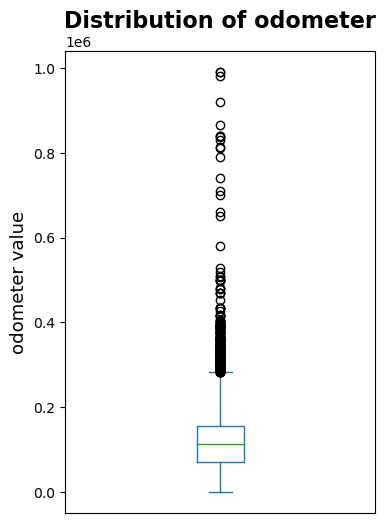

In [34]:
# Plot a boxplot for the odometer column to check if the distribution is skewed
df.plot(y = 'odometer', kind = 'box', figsize = (4,6))

plt.title('Distribution of odometer', fontsize = 16, fontweight = 'bold')
plt.xticks([])
plt.ylabel('odometer value', fontsize = 13)

plt.show()

The boxplot shows that the distribution of `odometer` is positively skewed. Therefore, the median will be used to fill in the missing values. In addition, the medians will be rounded to match the integral values of the original data.

Before filling the missing values in `odometer`, we will further check the distribution of the median of `odometer` based on `model_year` and `condition`.

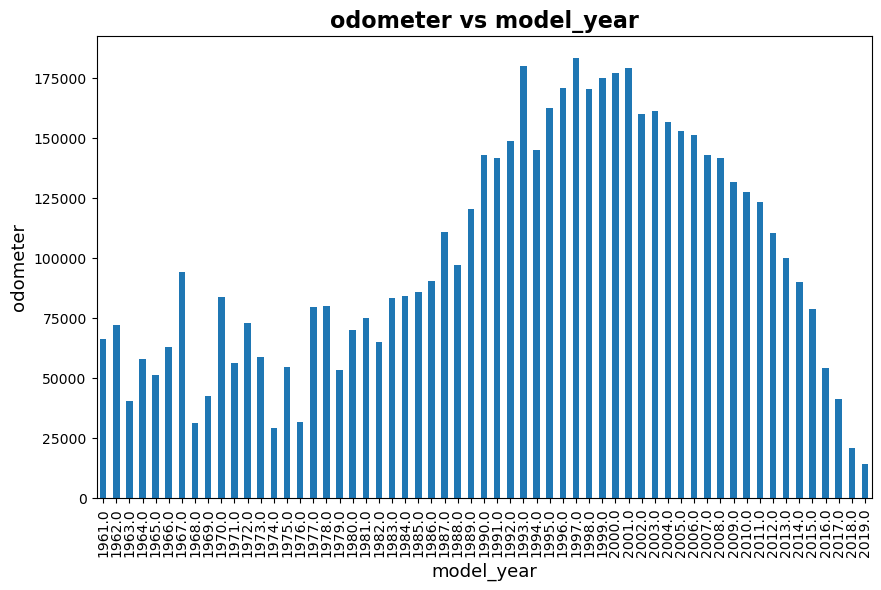

In [35]:
# Plot a bar chart of the median of odometer based on model_year
df.groupby('model_year')['odometer'].median().plot(kind = 'bar', figsize = (10,6))

plt.title('odometer vs model_year', fontsize = 16, fontweight = 'bold')
plt.xlabel('model_year', fontsize = 13)
plt.ylabel('odometer', fontsize = 13)

plt.show()

Starting from the year 2000, `odometer` values decrease as the `model_year` increases as expected. We will check the percentage of the cars which have `model_year` greater than 2000.

In [36]:
# Find the percentage of cars which have model_year greater than 2000
print(f'Percentage of cars which have model_year greater than 2000: {len(df[df["model_year"] > 2000]) / len(df):.2%}')

Percentage of cars which have model_year greater than 2000: 86.87%


With about 87% of the cars, `model_year` is a good indicator to fill the missing values of `odometer`.

Let's check another factor, the `condition` variable.

In [37]:
# Check the median of odometer from the model_year groups
df.groupby('condition')['odometer'].agg(['median','count']).sort_values('median', ascending = False)

,median,count
condition,,
fair,181613.0,1370
salvage,142673.5,98
good,129000.0,17053
excellent,104230.0,20973
like new,72982.5,4014
new,8002.0,125


The medians across the groups of `conditions` vary greatly, this result indicates that `condition` is a deciding factor to find the missing values of `odometer`.

In [38]:
# Fill the missing values in the odometer column by using the medians from the model_year and condition groups
df.loc[df['odometer'].isna(), 'odometer'] = (
    df.groupby(['model_year', 'condition'])['odometer'].transform('median').round()
)

# Check if all the missing values are filled
df.isna().sum()

price              0
model_year      3619
model              0
condition          0
cylinders          0
fuel               0
odometer         553
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

There are still 553 missing values in the `odometer` column. We will have a check on these missing values.

In [39]:
df[df['odometer'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
159,23300,NaN,nissan frontier crew cab sv,good,6.0,gas,NaN,other,pickup,grey,1.0,2018-07-24,73
260,14975,NaN,toyota 4runner,good,6.0,gas,NaN,automatic,SUV,silver,0.0,2018-05-13,57
370,4700,NaN,kia soul,good,4.0,gas,NaN,manual,sedan,white,0.0,2019-01-14,50
586,26000,NaN,toyota rav4,like new,4.0,gas,NaN,automatic,SUV,silver,0.0,2018-08-09,29
659,8400,NaN,volkswagen jetta,good,4.0,diesel,NaN,manual,wagon,silver,0.0,2018-10-22,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51195,21999,NaN,ram 2500,good,6.0,diesel,NaN,automatic,truck,white,1.0,2018-05-10,35
51222,1000,NaN,acura tl,good,6.0,gas,NaN,automatic,sedan,grey,0.0,2018-12-09,23
51257,6500,NaN,toyota corolla,good,4.0,gas,NaN,automatic,sedan,white,0.0,2018-10-16,75
51295,3850,NaN,hyundai elantra,excellent,4.0,gas,NaN,automatic,sedan,silver,0.0,2019-03-16,83


Looks like the rows with missing values in `odometer` also have missing values in `model_year`, let's have an investigation if this is true.

In [40]:
df[df['odometer'].isna() & df['model_year'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
159,23300,NaN,nissan frontier crew cab sv,good,6.0,gas,NaN,other,pickup,grey,1.0,2018-07-24,73
260,14975,NaN,toyota 4runner,good,6.0,gas,NaN,automatic,SUV,silver,0.0,2018-05-13,57
370,4700,NaN,kia soul,good,4.0,gas,NaN,manual,sedan,white,0.0,2019-01-14,50
586,26000,NaN,toyota rav4,like new,4.0,gas,NaN,automatic,SUV,silver,0.0,2018-08-09,29
659,8400,NaN,volkswagen jetta,good,4.0,diesel,NaN,manual,wagon,silver,0.0,2018-10-22,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51195,21999,NaN,ram 2500,good,6.0,diesel,NaN,automatic,truck,white,1.0,2018-05-10,35
51222,1000,NaN,acura tl,good,6.0,gas,NaN,automatic,sedan,grey,0.0,2018-12-09,23
51257,6500,NaN,toyota corolla,good,4.0,gas,NaN,automatic,sedan,white,0.0,2018-10-16,75
51295,3850,NaN,hyundai elantra,excellent,4.0,gas,NaN,automatic,sedan,silver,0.0,2019-03-16,83


The number of rows with missing values in both `odometer` and `model_year` is 549. Let's have a check on the remaining 7 rows.

In [41]:
df[df['odometer'].isna() & (df['model_year'].isna() == False)]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
21421,4500,1974.0,chevrolet corvette,fair,8.0,gas,NaN,automatic,sedan,red,0.0,2018-12-15,18
31806,1700,1996.0,ford mustang,salvage,6.0,gas,NaN,manual,convertible,white,0.0,2019-03-31,46
33257,4500,1963.0,chevrolet impala,fair,6.0,gas,NaN,automatic,sedan,silver,0.0,2019-03-17,38
46911,22300,2003.0,chevrolet corvette,new,8.0,gas,NaN,manual,convertible,black,0.0,2018-11-08,23


The rest of the 7 rows have a unique `model_year`. As a result, `model_year` will be removed as a factor and `condition` will be used as the deciding factor to fill the remaining 556 missing values in `odometer`.

In [42]:
# Fill the remaing missing values in the odometer column by using the medians from the condition groups only
df.loc[df['odometer'].isna(), 'odometer'] = (
    df.groupby('condition')['odometer'].transform('median').round()
)

# Check if all the missing values are filled
df.isna().sum()

price              0
model_year      3619
model              0
condition          0
cylinders          0
fuel               0
odometer           0
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

All the missing values in the `odometer` column are fixed.

**`model_year` column**

In [43]:
# Create a dataframe containing the rows with missing values in model_year column
model_year_na_df = df[df['model_year'].isna()]

# Find the percentage of missing values in the model_year column
print(f'The percentage of missing values in the paint_color column: {len(model_year_na_df) / len(df):.2%}')

The percentage of missing values in the paint_color column: 7.02%


In [44]:
# Compare the distribution of data in df and model_year_na_df based on the numerical columns
print('df')
display(df.describe())
print('-'*100)
print('model_year_na_df')
display(model_year_na_df.describe())

df


,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,51525.000000,51525.000000,51525.000000,51525.00000
mean,12132.464920,2009.767816,6.121494,115219.226589,0.496303,39.55476
std,10040.803015,6.183288,1.657296,62187.496434,0.499991,28.20427
min,1.000000,1961.000000,3.000000,0.000000,0.000000,0.00000
25%,5000.000000,2006.000000,4.000000,73000.000000,0.000000,19.00000
50%,9000.000000,2011.000000,6.000000,114459.000000,0.000000,33.00000
75%,16839.000000,2014.000000,8.000000,152381.000000,1.000000,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.000000,271.00000


----------------------------------------------------------------------------------------------------
model_year_na_df


,price,model_year,cylinders,odometer,is_4wd,days_listed
count,3619.000000,0.0,3619.000000,3619.000000,3619.000000,3619.000000
mean,11761.815142,NaN,6.111357,117026.572534,0.499586,39.421387
std,9465.731785,NaN,1.665847,58948.653197,0.500069,28.238297
min,1.000000,NaN,3.000000,0.000000,0.000000,0.000000
25%,4995.000000,NaN,4.000000,79122.000000,0.000000,19.000000
50%,8980.000000,NaN,6.000000,113900.000000,0.000000,33.000000
75%,15995.000000,NaN,8.000000,149234.500000,1.000000,54.000000
max,109999.000000,NaN,10.000000,415371.000000,1.000000,256.000000


In [45]:
# Compare the distribution of data in df and model_year_na_df based on the categorical columns
check_na_category_distr('model_year')

,condition,distribution in original df,distribution in model_year na df
0,excellent,0.480796,0.469467
1,good,0.390975,0.400663
2,like new,0.092033,0.092014
3,fair,0.031189,0.031777
4,new,0.002775,0.002763
5,salvage,0.002232,0.003316


----------------------------------------------------------------------------------------------------


,fuel,distribution in original df,distribution in model_year na df
0,gas,0.917768,0.912130
1,diesel,0.072082,0.075712
2,hybrid,0.007938,0.010500
3,other,0.002096,0.001658
4,electric,0.000116,NaN


----------------------------------------------------------------------------------------------------


,transmission,distribution in original df,distribution in model_year na df
0,automatic,0.910277,0.914617
1,manual,0.054905,0.051672
2,other,0.034818,0.033711


----------------------------------------------------------------------------------------------------


,type,distribution in original df,distribution in model_year na df
0,SUV,0.240757,0.253938
1,truck,0.239748,0.231003
2,sedan,0.235885,0.234319
3,pickup,0.135623,0.139265
4,coupe,0.044697,0.040066
5,wagon,0.029908,0.030395
6,mini-van,0.022533,0.023763
7,hatchback,0.020320,0.020171
8,van,0.012285,0.010776
9,convertible,0.008656,0.007461


----------------------------------------------------------------------------------------------------


,model,distribution in original df,distribution in model_year na df
0,ford f-150,0.054265,0.052777
1,chevrolet silverado 1500,0.042135,0.042830
2,ram 1500,0.033964,0.032329
3,chevrolet silverado,0.024668,0.027079
4,jeep wrangler,0.021718,0.019342
5,ram 2500,0.021174,0.022106
6,toyota camry,0.019214,0.014921
7,honda accord,0.018709,0.022106
8,chevrolet silverado 2500hd,0.017758,0.014921
9,gmc sierra 1500,0.017584,0.014921


----------------------------------------------------------------------------------------------------


Again, no unusual pattern can be found from the distributions of the numerical and categorical columns.

The `model_year` column depends on the `model` and `condition`. Same as the `odometer` column, `model_year` is a numerical variable, a boxplot will be plot to check if the distribution of `model_year` data is skewed.

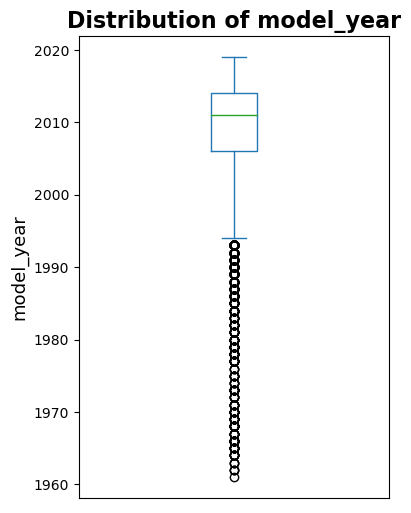

In [46]:
# Plot a boxplot for the odometer column to check if the distribution is skewed
df.plot(y = 'model_year', kind = 'box', figsize = (4,6))

plt.title('Distribution of model_year', fontsize = 16, fontweight = 'bold')
plt.xticks([])
plt.ylabel('model_year', fontsize = 13)

plt.show()

As shown in the boxplot, the distribution of the `model_year` is negatively skewed, thus the medians from the `model` and `condition` groups will be rounded and taken to fill in the missing values.

The `model_year` definitely depends on the `model` of the cars, so we will only check the distribution of the `model_year` medians from the `condition` groups.

In [47]:
# Check the medians of model_year for each condition
df.groupby('condition')['model_year'].agg(['mean','median','count']).sort_values('median', ascending = False)

,mean,median,count
condition,,,
new,2014.466165,2018.0,133
like new,2012.493082,2014.0,4409
excellent,2010.731299,2012.0,23074
good,2008.547205,2009.0,18695
salvage,2005.631068,2005.0,103
fair,2001.975201,2003.0,1492


The table shows that the better the condition of a car, the 'newer' the `model_year`. This implies that the `condition` indeed is a factor of `model_year`.

In [48]:
# Fill the remaing missing values in the model_year column by using the medians from the model and condition groups
df.loc[df['model_year'].isna(), 'model_year'] = (
    df.groupby(['model', 'condition'])['model_year'].transform('median').round()
)

# Check if all the missing values are filled
df.isna().sum()

price           0
model_year      6
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

There are still 6 missing values in the model_year column. Let's take a look at these 6 rows to decide if we can fill them in with some values.

In [49]:
# Check on the 6 rows with missing values in the model_year column
df[df['model_year'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
10444,9600,NaN,chevrolet cruze,new,4.0,gas,19000.0,automatic,sedan,white,0.0,2018-07-30,33
18125,15000,NaN,cadillac escalade,salvage,8.0,gas,108000.0,automatic,SUV,black,1.0,2018-06-03,49
20368,7000,NaN,volkswagen jetta,new,4.0,diesel,171000.0,automatic,sedan,white,0.0,2019-03-28,107
21758,23000,NaN,ford escape,new,4.0,gas,12000.0,automatic,SUV,grey,1.0,2019-02-13,23
27192,1200,NaN,toyota rav4,salvage,4.0,gas,148000.0,automatic,SUV,green,1.0,2018-10-19,21
47905,13900,NaN,jeep wrangler,new,6.0,gas,149000.0,automatic,SUV,silver,1.0,2019-04-10,35


These six vehicles have different `model` which is a key factor for `model_year`, thus we do not have enough information to fill these last 6 missing values and they will be dropped.

In [50]:
# Drop the last 6 missing values of the dataset
df = df.dropna().reset_index(drop = True)

In [51]:
# Last check on the missing values
df.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

All the missing values are now fixed. Next, we will move on to see if any of the data type need an adjustment.

[Back to Contents](#back)

### Fixing Data Types <a id='fix_data_types'></a>

To fix the data types of the column, we will first check on some rows of the dataset and compare them to the `dtypes` of the columns

In [52]:
# Have a look at the first 10 rows of the dataset
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,black,1.0,2018-06-23,19
1,25500,2008.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,193850.0,automatic,pickup,white,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,silver,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [53]:
# Check the data type of each column
df.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

By observing the table above, two adjustments will be made.
- The data types of `model_year`, `cylinders`, `odometer` and `is_4wd` will be changed to `int64` to match the integral values in the dataset.
- The data type of `date_posted` will be changed to `datetime` so that we can manipulate these data by using the `datetime` properties if we have to.

In [54]:
# Change the data types of model_year, cylinders, odometer and is_4wd to int64
df['model_year'] = df['model_year'].astype('int64')
df['cylinders'] = df['cylinders'].astype('int64')
df['odometer'] = df['odometer'].astype('int64')
df['is_4wd'] = df['odometer'].astype('int64')

# Change the data type of date_posted to datetime
df['date_posted'] = pd.to_datetime(df['date_posted'], format = '%Y-%m-%d')

# Check if the changes are successful
df.dtypes

price                    int64
model_year               int64
model                   object
condition               object
cylinders                int64
fuel                    object
odometer                 int64
transmission            object
type                    object
paint_color             object
is_4wd                   int64
date_posted     datetime64[ns]
days_listed              int64
dtype: object

All the changes are successfully applied to the columns.

[Back to Contents](#back)

### Enrichment of Data <a id='enrich_data'></a>

To facilitate the analysis process later, some additional columns will be added as follows.
- The values of `year`, `month`, and `day of week` when the advertisement was placed.
- The `vehicle's age` in years when the advertisement was placed.
- The `vechicle's average mileage per year`
- The `condition_score` column: This column is added to make the manipulation of this data easier.

In [55]:
# Add year, month and day of week when the advertisement was placed
df['date_posted_year'] = df['date_posted'].dt.year
df['date_posted_month'] = df['date_posted'].dt.month_name()
df['date_posted_day'] = df['date_posted'].dt.day_name()

# Check if the addition of the columns is successful
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_posted_year,date_posted_month,date_posted_day
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,black,145000,2018-06-23,19,2018,June,Saturday
1,25500,2008,ford f-150,good,6,gas,88705,automatic,pickup,white,88705,2018-10-19,50,2018,October,Friday
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,110000,2019-02-07,79,2019,February,Thursday
3,1500,2003,ford f-150,fair,8,gas,193850,automatic,pickup,white,193850,2019-03-22,9,2019,March,Friday
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,80903,2019-04-02,28,2019,April,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51514,9249,2013,nissan maxima,like new,6,gas,88136,automatic,sedan,black,88136,2018-10-03,37,2018,October,Wednesday
51515,2700,2002,honda civic,salvage,4,gas,181500,automatic,sedan,white,181500,2018-11-14,22,2018,November,Wednesday
51516,3950,2009,hyundai sonata,excellent,4,gas,128000,automatic,sedan,blue,128000,2018-11-15,32,2018,November,Thursday
51517,7455,2013,toyota corolla,good,4,gas,139573,automatic,sedan,black,139573,2018-07-02,71,2018,July,Monday


The three additional columns of datetime are added. 

Now we will proceed to add the `vehicle_age` column. To get the `vehicle_age` value, we will subtracted the `model_year` column from the `date_posted_year` column. However, since we have fill in some missing values in `model_year`, the `date_posted_year` value could be smaller than the `model_year` value. Therefore, we will have a condition check
- If the `date_posted_year` value is larger than the `model_year`, the `vehicle_age` will be calculated as stated.
- If a row fails with the condition check, the `vehicle_age` value will be assigend as `NaN`.

In [56]:
# Add the vehicle_age column
df['vehicle_age'] = df['date_posted'].dt.year - df['model_year'].where(
    df['date_posted'].dt.year >= df['model_year'], float('nan')
)

# Check if the vehichle_age column has any missing value
df.isna().sum()

price                0
model_year           0
model                0
condition            0
cylinders            0
fuel                 0
odometer             0
transmission         0
type                 0
paint_color          0
is_4wd               0
date_posted          0
days_listed          0
date_posted_year     0
date_posted_month    0
date_posted_day      0
vehicle_age          0
dtype: int64

No missing value in the `vehicle_age` column. We will also have a check on the distribution of this column to see if the values are reasonable.

In [57]:
# Check the distribution of vehicle_age column
df['vehicle_age'].describe()

count    51519.000000
mean         8.505153
std          6.049626
min          0.000000
25%          4.000000
50%          7.000000
75%         12.000000
max         57.000000
Name: vehicle_age, dtype: float64

No negative values in the `vehicle_age` column and 75% of the values lie between 0 to 12. Everything looks good except that the data type in `float64`, we will convert it to `int64`.

In [58]:
# Convert the data type of vehicle_age to int64
df['vehicle_age'] = df['vehicle_age'].astype('int64')

# Check if the conversion is successful
df.dtypes

price                         int64
model_year                    int64
model                        object
condition                    object
cylinders                     int64
fuel                         object
odometer                      int64
transmission                 object
type                         object
paint_color                  object
is_4wd                        int64
date_posted          datetime64[ns]
days_listed                   int64
date_posted_year              int64
date_posted_month            object
date_posted_day              object
vehicle_age                   int64
dtype: object

Looks good, let's continue to add the `mileage_per_year` column. We will divide the `odometer` column by the `vehicle_age` column to get the desired values. We have noticed that there are some 0 values in the `vehicle_age` columns, any number divided by 0 is undefined in mathematics and a `NaN` value will be assigned in python. To avoid this error, for those rows with values of 0 in the `vehicle_age` column, we can assign the `mileage_per_year` value as the corresponding `odometer` value.

In [59]:
# Create the mileage_per_year column
df['mileage_per_year'] = (df['odometer'] / df['vehicle_age']).where(
    df['vehicle_age'] != 0, df['odometer']
)

# Look at some of the rows to see if the values in the mileage_per_year column are correctly calculated
display(df[['odometer', 'vehicle_age', 'mileage_per_year']])

# Have a a check on the distribution of the mileage_per_year column
df['mileage_per_year'].describe()

,odometer,vehicle_age,mileage_per_year
0,145000,7,20714.285714
1,88705,10,8870.500000
2,110000,6,18333.333333
3,193850,16,12115.625000
4,80903,2,40451.500000
...,...,...,...
51514,88136,5,17627.200000
51515,181500,16,11343.750000
51516,128000,9,14222.222222
51517,139573,5,27914.600000


count     51519.000000
mean      17795.326675
std       12620.687161
min           0.000000
25%       10879.421429
50%       15169.500000
75%       21229.785714
max      373200.000000
Name: mileage_per_year, dtype: float64

All values in the `mileage_per_year` are calculated as expected. Also, there are 51525 counts in the column means there is no missing values.

To add the `condition_score` column, a dictionary of condition and condition_score in dataframe will be created and merged with the original dataset. The values in the `condition_score` column will be assigned as follows.
- new = 5, like new = 4, excellent = 3, good = 2, fair = 1, salvage = 0

In [60]:
# Create a dictionary in dataframe to pair the condition and condition_score
condition_dict = {
    "salvage": 0, "fair": 1,
    "good": 2,"excellent": 3,
    "like new": 4, "new": 5
}

# Have a look at the dictionary
condition_dict

{'salvage': 0, 'fair': 1, 'good': 2, 'excellent': 3, 'like new': 4, 'new': 5}

In [61]:
# Create the condition_score column and map the corresponding values
df['condition_score'] = df['condition'].map(condition_dict)

In [62]:
# Check if the condition_score column has correct values
df[['condition_score', 'condition']].value_counts().sort_index()

condition_score  condition
0                salvage        113
1                fair          1607
2                good         20145
3                excellent    24773
4                like new      4742
5                new            139
dtype: int64

All the values in `condition_score` and `condtion` are perfectly matched. 

Before ending the data cleaning stage, we will have a overview of the clean data.

In [63]:
# Check the general information of the clean data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51519 entries, 0 to 51518
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   price              51519 non-null  int64         
 1   model_year         51519 non-null  int64         
 2   model              51519 non-null  object        
 3   condition          51519 non-null  object        
 4   cylinders          51519 non-null  int64         
 5   fuel               51519 non-null  object        
 6   odometer           51519 non-null  int64         
 7   transmission       51519 non-null  object        
 8   type               51519 non-null  object        
 9   paint_color        51519 non-null  object        
 10  is_4wd             51519 non-null  int64         
 11  date_posted        51519 non-null  datetime64[ns]
 12  days_listed        51519 non-null  int64         
 13  date_posted_year   51519 non-null  int64         
 14  date_p

In [64]:
# Look at first 10 rows of the clean data
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_posted_year,date_posted_month,date_posted_day,vehicle_age,mileage_per_year,condition_score
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,black,145000,2018-06-23,19,2018,June,Saturday,7,20714.285714,2
1,25500,2008,ford f-150,good,6,gas,88705,automatic,pickup,white,88705,2018-10-19,50,2018,October,Friday,10,8870.500000,2
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,110000,2019-02-07,79,2019,February,Thursday,6,18333.333333,4
3,1500,2003,ford f-150,fair,8,gas,193850,automatic,pickup,white,193850,2019-03-22,9,2019,March,Friday,16,12115.625000,1
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,80903,2019-04-02,28,2019,April,Tuesday,2,40451.500000,3
5,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,57954,2018-06-20,15,2018,June,Wednesday,4,14488.500000,3
6,12990,2015,toyota camry,excellent,4,gas,79212,automatic,sedan,white,79212,2018-12-27,73,2018,December,Thursday,3,26404.000000,3
7,15990,2013,honda pilot,excellent,6,gas,109473,automatic,SUV,black,109473,2019-01-07,68,2019,January,Monday,6,18245.500000,3
8,11500,2012,kia sorento,excellent,4,gas,104174,automatic,SUV,silver,104174,2018-07-16,19,2018,July,Monday,6,17362.333333,3
9,9200,2008,honda pilot,excellent,6,gas,147191,automatic,SUV,blue,147191,2019-02-15,17,2019,February,Friday,11,13381.000000,3


[Back to Contents](#back)

## 4. Exploratory Data Analysis <a id='eda'></a>

In this stage, we will study the core variables to find and treat the anomalies and outliers. 8 variables are selected and grouped into either categorical variables or numerical variables. A graph will be plotted for each of the variables as follows.
- Categorical variables (`cylinders`, `condition_score`, `paint_color`, `transmission`): Bar chart
- Numerical variables (`price`, `odometer`, `vehicle_age`, `mileage_per_year`): Histogram

### Categorical Variables <a id='categorical_eda'></a>

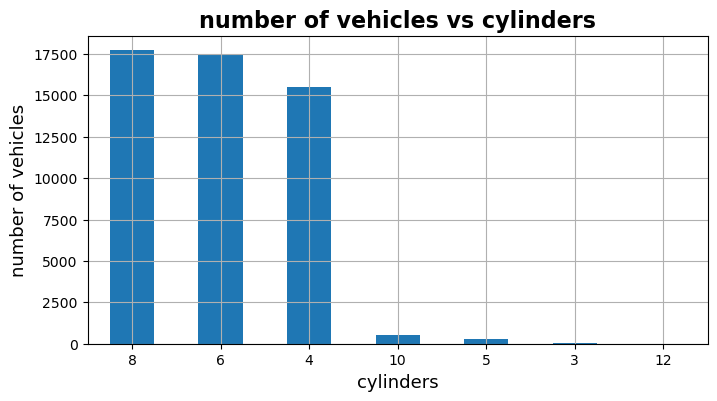

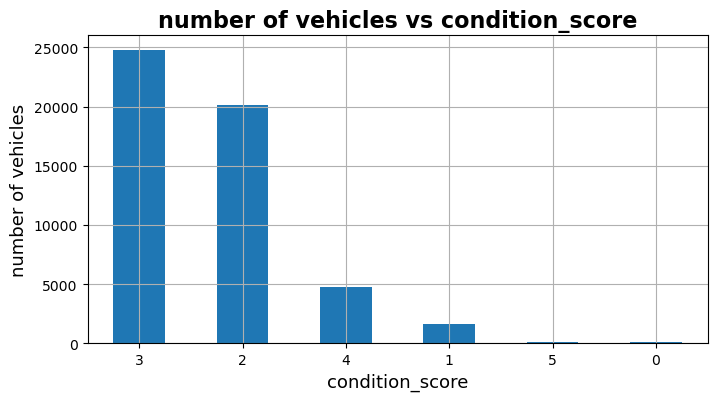

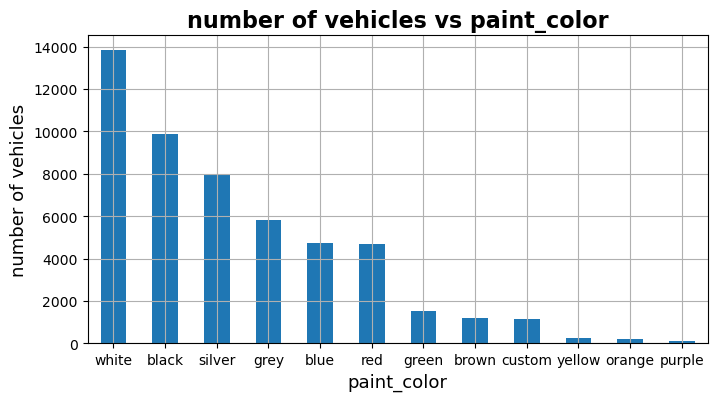

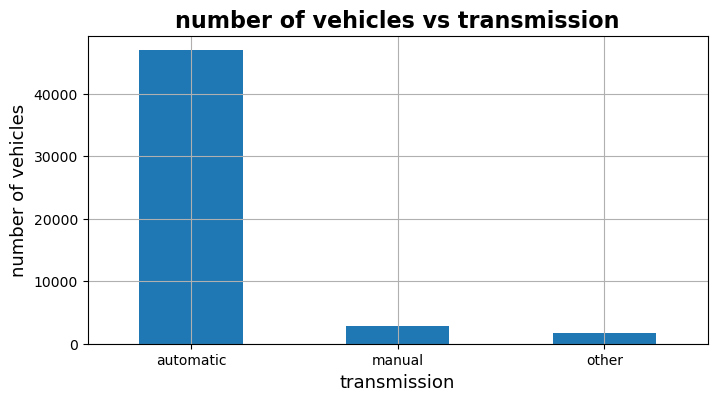

In [65]:
# Plot bar charts for categorical columns
categorical_columns = ['cylinders', 'condition_score', 'paint_color', 'transmission']

for col in categorical_columns:
    
    df[col].value_counts().plot(kind = 'bar', figsize = (8,4), grid = True)
    
    plt.title(f'number of vehicles vs {col}', fontsize = 16, fontweight = 'bold')
    plt.xlabel(col, fontsize = 13)
    plt.ylabel('number of vehicles', fontsize = 13)    
    plt.xticks(rotation = 0)
    
    plt.show()

From each of the four bar charts, we find the following observations.

**Majority categories in each column**
- `cylinders`: 8, 6, and 4 cylinders
- `condition_score`: 3(excellent) and 4(like new)
- `paint_color`: white, black and silver
- `transmission`: auto

**Minority categories in each column**
- `cylinders`: 3 and 12 cylinders
- `condition_score`: 5(new) and 0(salvage)
- `paint_color`: yellow, orange, purple
- `transmission`: manual and other

The majority categories will play a key role to produce meaningful conclusions in this project. On the other hands, the number of vehicles in the minority categories may not provide enough data to have a convincing analysis result and will be excluded from the hypothesis testing.

[Back to Contents](#back)

### Numerical Variables <a id='numerical_eda'></a>

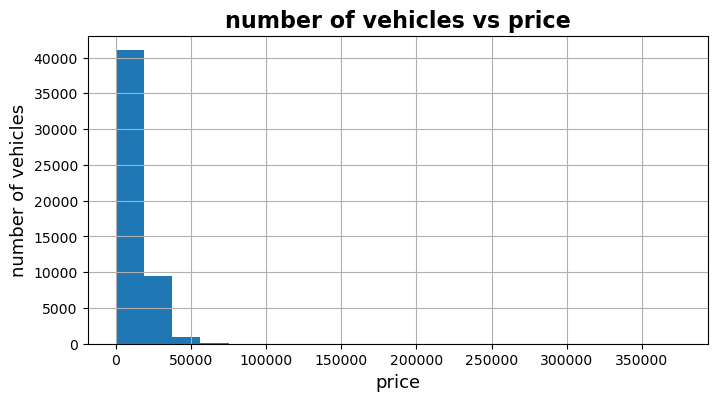

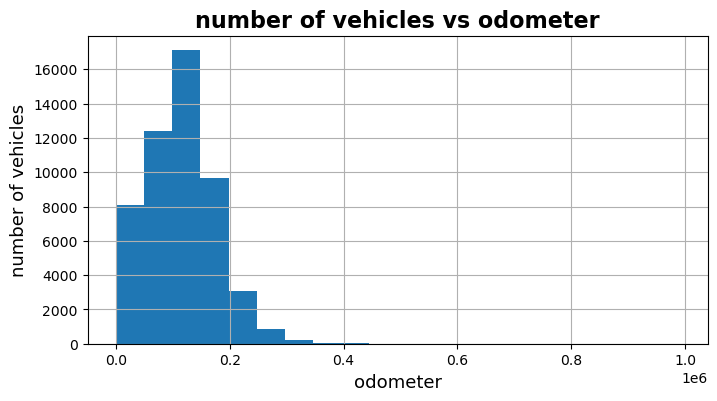

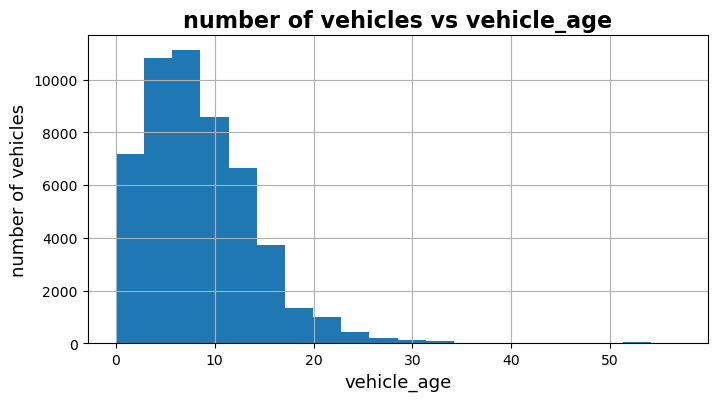

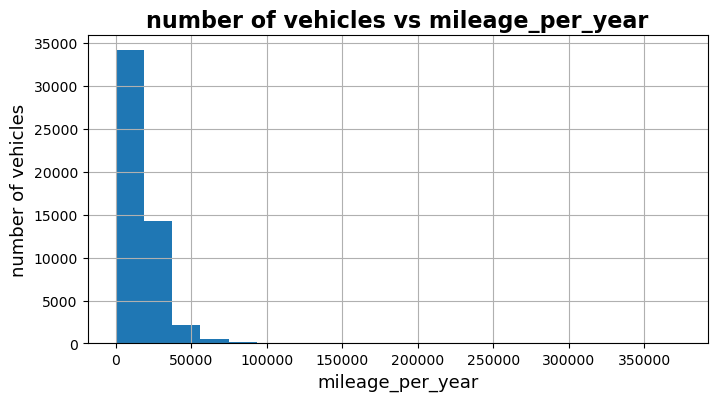

In [66]:
# Plot histograms for numerical columns
numerical_columns = ['price', 'odometer', 'vehicle_age', 'mileage_per_year']

for col in numerical_columns:
    
    df.hist(column = col, bins = 20, figsize = (8,4))
    
    plt.xlabel(col, fontsize = 13)
    plt.ylabel('number of vehicles', fontsize = 13)
    plt.title(f'number of vehicles vs {col}', fontsize = 16, fontweight = 'bold')
    
    plt.show()

From the overview of the four histograms, all of these numerical data are heavily skewed to the right and have outliers. Due to the outliers, the readability of the histogram is poor and we can only visualise the approximate range where the data lie within.

- `price`: 0 to 50000
- `odometer`: 0 to 300000
- `vehicle_age`: 0 to 30
- `mileage_per_year`: 0 to 75000

Besides that, an unusual spike is detected in the histogram of the `price` column near the value of 0. 

**Dealing with the anomalies and the outliers**

First, we have to deal with the anomalies in the `price` column so that it will not affect the the calculation of outliers. Then, we will remove the outliers and create a dataframe without outliers. 

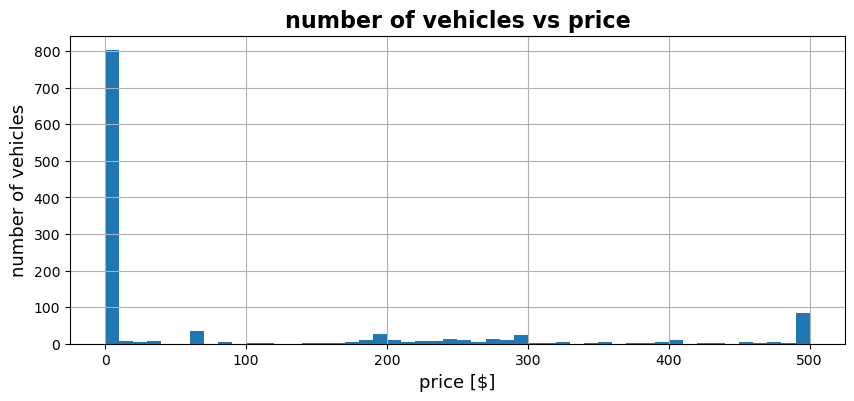

In [67]:
# Take a closer look at the anomalies near the 0 value
df.hist(column = 'price', bins = 50, range = (0,500), figsize = (10,4))

plt.title(f'number of vehicles vs price', fontsize=16, fontweight = 'bold')
plt.xlabel('price [$]', fontsize = 13)
plt.ylabel('number of vehicles', fontsize = 13)

plt.show()

There are almost 800 vehicles with the `price` of 0 to 10 which is not sound at all. To play safe, we will take all the values from 0 to 100 as anomalies. Let's calculate the number and the percentage of these anomalies.

In [68]:
# Check the percentage of anomalies in the price column
print(f'The number of anomalies in the price column: {len(df.query("price <= 100"))}')
print(f'The percentage of anomalies in the price column: {len(df.query("price <= 100")) / len(df):.2%}')

The number of anomalies in the price column: 863
The percentage of anomalies in the price column: 1.68%


Since the `price` variable is the main concern in this report and the anomalies only account for 1.67% of the whole dataset, we will not replace these values with other values. These anomalies will be reassigned a value of `NaN` and excluded from the analysis tasks in the later stage.

In [69]:
# Assign the anomalies in the price column with a value of NaN
df.loc[df['price'] <=100, 'price'] = float('NaN')

# Check if all the anomalies are replaced with NaN
print(f'The number of NaN values in the price column: {df["price"].isna().sum()}')

The number of NaN values in the price column: 863


Done. Next, we will create a dataframe of numerical columns without outliers

In [70]:
# Create a dictionary to store the upper bound and lower bound values of all numerical columns
outlier_dict = {}

for col in numerical_columns:
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3 - Q1
    
    outlier_dict[col] = {}
    outlier_dict[col]['upper_bound'] = Q3 + 1.5*IQR
    outlier_dict[col]['lower_bound'] = Q1 - 1.5*IQR

# Have a look at the outlier_dict
outlier_dict

{'price': {'upper_bound': 34425.0, 'lower_bound': -12175.0},
 'odometer': {'upper_bound': 271473.25, 'lower_bound': -46080.75},
 'vehicle_age': {'upper_bound': 24.0, 'lower_bound': -8.0},
 'mileage_per_year': {'upper_bound': 36755.33214285715,
  'lower_bound': -4646.125000000002}}

In [71]:
# Check the percentage of outliers in each numerical column
for col, values in outlier_dict.items():
    
    outlier_count = len(df.query(
        f'{col} < {values["lower_bound"]} or {col} > {values["upper_bound"]}'
    ))
    outlier_percentage = outlier_count  / len(df)
    
    print(f'Percentage of outliers in the {col} column: {outlier_percentage:.2%}')

Percentage of outliers in the price column: 3.28%
Percentage of outliers in the odometer column: 1.25%
Percentage of outliers in the vehicle_age column: 1.41%
Percentage of outliers in the mileage_per_year column: 6.10%


The percentage of outliers in each column is low and we can safely remove them.

In [72]:
# Create a good_data dataframe to store the data without outliers
good_data = pd.DataFrame()

for col, values in outlier_dict.items():
    to_merge = df.query(f'{values["lower_bound"]} <= {col} <= {values["upper_bound"]}')[col]
    
    good_data = pd.concat([good_data, to_merge], axis=1)

In [73]:
# Have a look at the good_data dataframe
good_data

,price,odometer,vehicle_age,mileage_per_year
0,9400.0,145000.0,7.0,20714.285714
1,25500.0,88705.0,10.0,8870.500000
2,5500.0,110000.0,6.0,18333.333333
3,1500.0,193850.0,16.0,12115.625000
4,14900.0,80903.0,2.0,NaN
...,...,...,...,...
51459,NaN,86456.0,10.0,8645.600000
51461,NaN,111623.0,4.0,27905.750000
35105,NaN,NaN,22.0,13636.363636
48956,NaN,NaN,4.0,NaN


The `good_data` now has `51525` rows which is same as the original dataset. The `index` will not be reset for the time being as we will still merge other necessary columns to `good_data` on `index` column.

In [74]:
# Look at the distribution of the numerical columns in good_data
good_data.describe()

,price,odometer,vehicle_age,mileage_per_year
count,48964.000000,50874.000000,50791.000000,48378.000000
mean,11268.974757,112555.064512,8.148491,15503.892255
std,7704.662027,56880.013392,5.197005,7304.378338
min,105.000000,0.000000,0.000000,0.000000
25%,5000.000000,72705.500000,4.000000,10601.843750
50%,8995.000000,113190.500000,7.000000,14637.750000
75%,15980.000000,150457.500000,12.000000,19600.000000
max,34400.000000,271175.000000,24.000000,36752.600000


The required dataframe is created as desired. Now, we will make a side by side histograms of the original data and the `good_data` to compare the changes in the distribution.

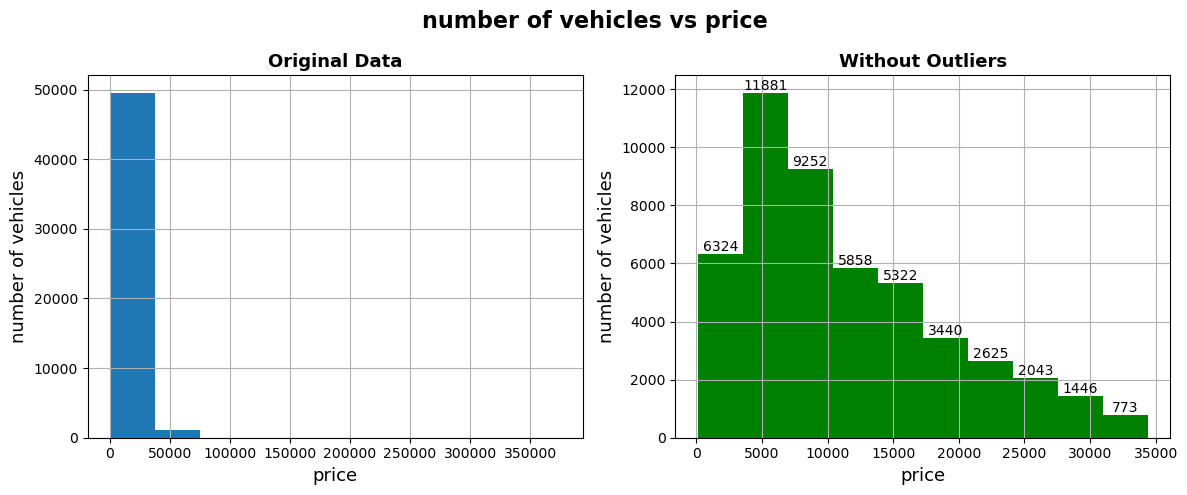

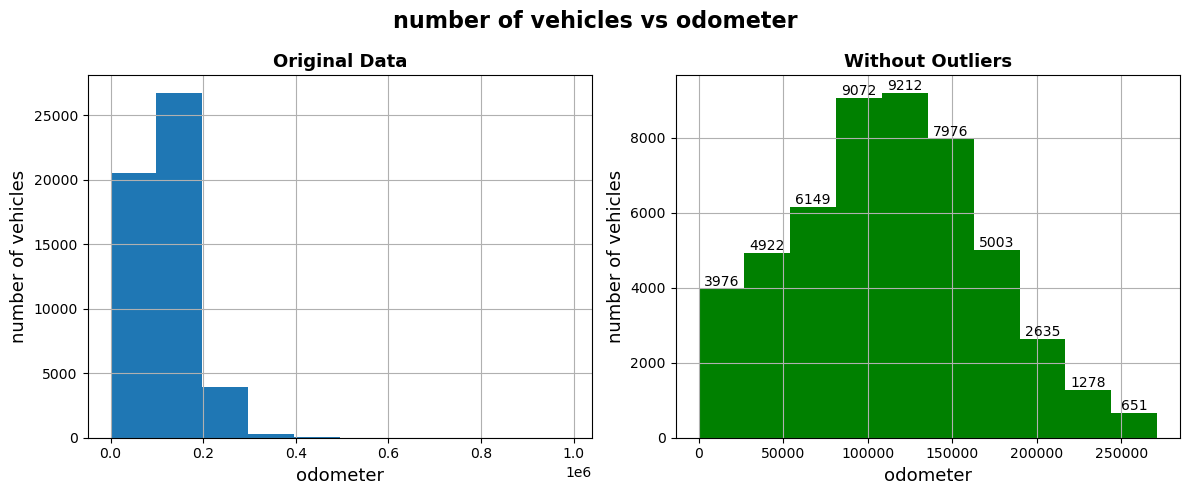

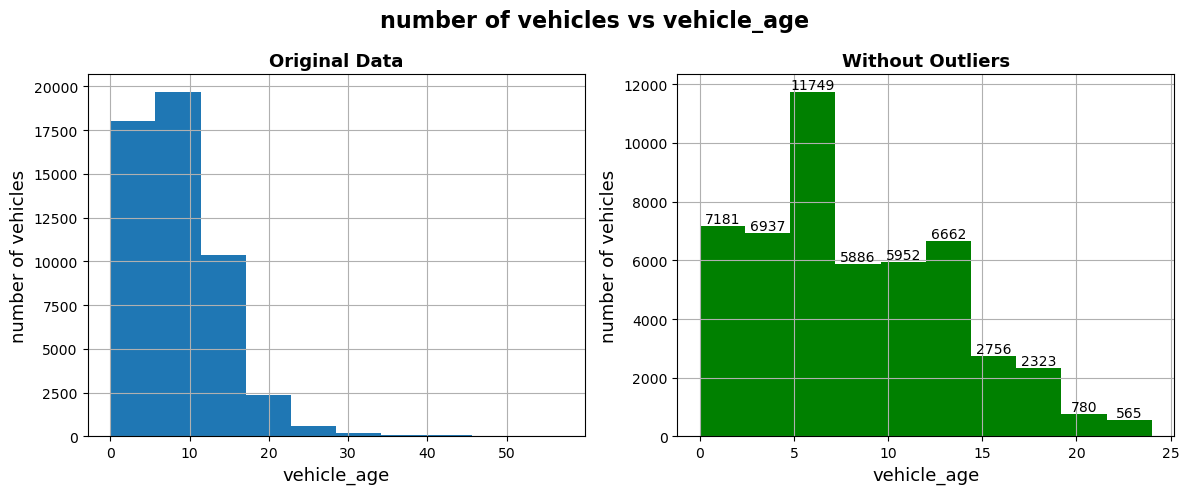

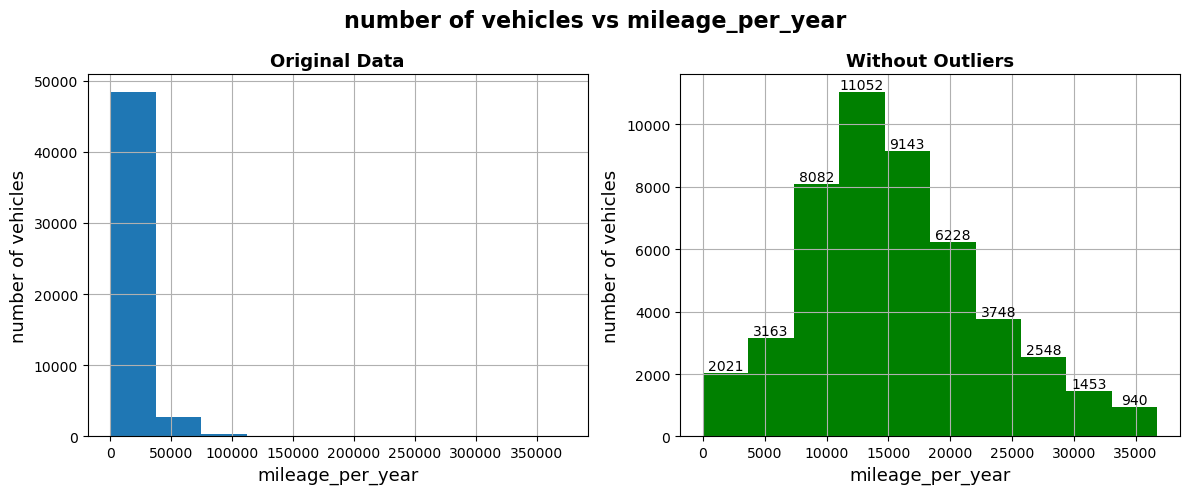

In [75]:
for col in numerical_columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,5))

    ax1.hist(df[col])
    counts, bins, patches = ax2.hist(good_data[col], color = 'green')
    
    fig.suptitle(f'number of vehicles vs {col}', fontsize = 16, fontweight = 'bold')
    
    ax1.set_title('Original Data', fontsize = 13, fontweight = 'bold')
    ax1.set_xlabel(col, fontsize=13)
    ax1.set_ylabel('number of vehicles', fontsize = 13)
    ax1.grid()
    
    ax2.set_title('Without Outliers', fontsize = 13, fontweight = 'bold')    
    ax2.set_xlabel(col, fontsize = 13)
    ax2.set_ylabel('number of vehicles', fontsize = 13) 
    ax2.bar_label(patches)
    ax2.grid()
    
    plt.tight_layout()
    
    plt.show()

After the removal of outliers, the readability of the data increases significantly. Now, with a same size of histogram, the visible range of data from each column is reduced, thus we can have a better visualistation on how is the distribution of the data.

**Below are the new range after removal of outliers (the range that was found earlier is shown in the bracket) and some findings from the histogram.**
- `price`: 0 to 34000 (0 to 50000). About 21000 or 40% of the vehicles have a price around 4000 to 1000.
- `odometer`: 0 to 250000 (0 to 300000). The odometer reading of about 26000 or 50% of the vehicles is around 80000 to 160000.
- `vehicle_age`: 0 to 23 (0 to 30). About 40000 or 80% of the vehicles have ages around 0 to 14.
- `mileage_per_year`: 5000 to 35000 (0 to 75000). About 28000 or 55% of the vehicles have an average mileages per year around 7000 to 18000.

However, after the removal of anomalies, the above histogram of price does not show this result, let's increase the number of bins and reduce the range to have a more detailed visualisation.

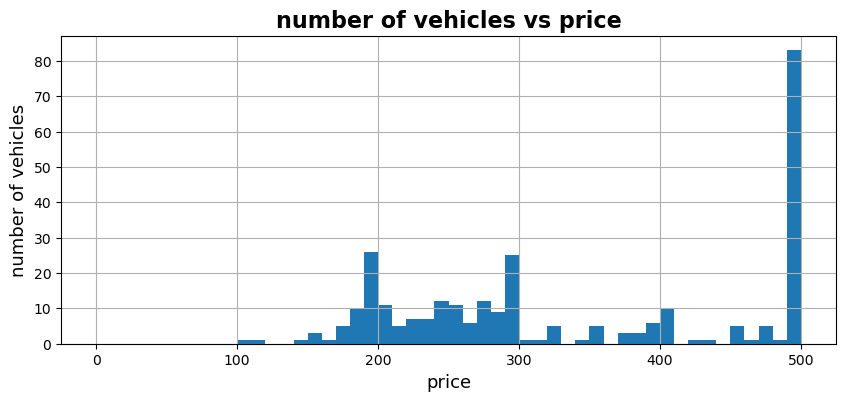

In [76]:
# View the histogram of price in good_data in detail
good_data.hist(column = 'price', bins = 50, range = (0,500), figsize = (10,4))

plt.title(f'number of vehicles vs price', fontsize = 16, fontweight = 'bold')
plt.xlabel('price', fontsize = 13)
plt.ylabel('number of vehicles', fontsize = 13)

plt.show()

The anomalies in the `price` column does no longer exist. The `good_data` will be used to test the hypotheses.

[Back to Contents](#back)

### Lifetime of Advertisements <a id='lifetime_of_ads'></a>
Before testing the hyotheses, we will continue to work on the `good_data` by considering the lifetime of advertisements, i.e. the `days_listed` column. The advertisements with abnormally short or long lifetime are unlikely to produce a meaningful result in the analysis process. For example, it is possible that a seller regretting to sell the vehicle and the advertisement is taken down after one or two days. If an advertisement is listed too long, it could mean that no one is willing to buy the vehicle. In both scenarios, we cannot analyse which factor decides the price since the vehicle does not sell out at all. Hence, we will find a typical lifetime of advertisements to slice the `good_data` and find the price factors.

In [77]:
# Merge the days_listed column to good_data
good_data = pd.concat([good_data, df['days_listed']], axis = 1)

# Find the mean and median of days_listed
good_data['days_listed'].describe()

count    51519.000000
mean        39.554164
std         28.204082
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

The mean of `days_listed` is 39.55 days and the median is 33 days. 50% of the data lies between 19 days to 53 days.

To find an appropriate range of typical lifetime, we will calculate the upper bound and lower bound of the data and decide if these two values are suitable to be used as the range.

In [78]:
# Find the upper bound and the lower bound of days_listed
days_Q1 = good_data['days_listed'].quantile(.25)
days_Q3 = good_data['days_listed'].quantile(.75)
days_IQR = days_Q3 - days_Q1

print(f'The upper bound of days_listed: {days_Q3 + 1.5*days_IQR}')
print(f'The lower bound of days_listed: {days_Q1 - 1.5*days_IQR}')

The upper bound of days_listed: 104.0
The lower bound of days_listed: -32.0


The upper bound is 104 days which is good to be taken as the upper limit of the range of the typical lifetime. However, the negative value of lower bound is not applicable as a lower limit. Let's plot a histogram to see if we can find any insight relating to the lower limit.

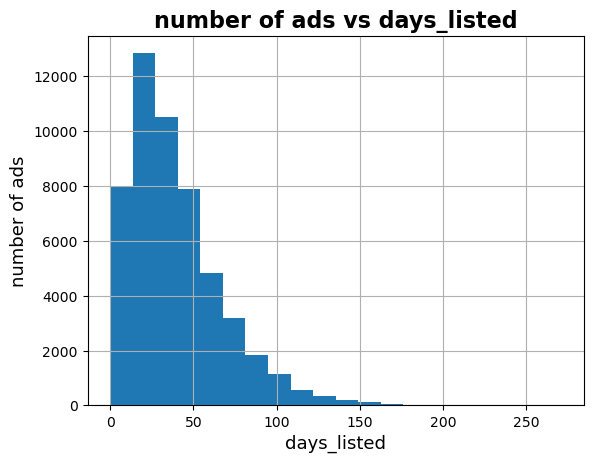

In [79]:
good_data.hist(column='days_listed', bins=20)

plt.title(f'number of ads vs days_listed', fontsize = 16, fontweight = 'bold')
plt.xlabel('days_listed', fontsize = 13)
plt.ylabel('number of ads', fontsize = 13)

plt.show()

From the histogram, majority of the data lies between 0 to 100. The value of 100 days is close to the upper bound of `days_listed` and will be taken as the upper limit of the typical lifetime. To find the lower limit, we will increase the number of bins and decrease the range of the histogram.

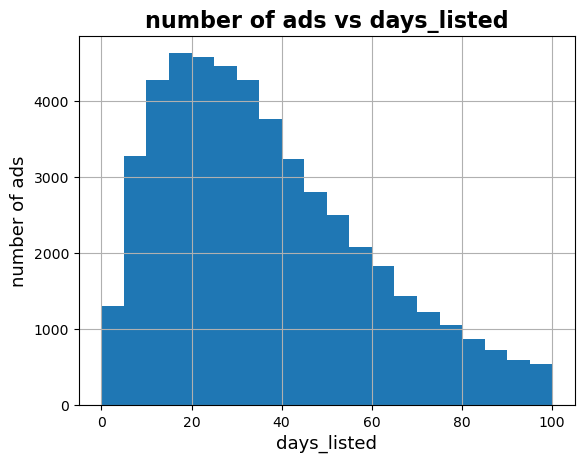

In [80]:
# Plot the histogram again with the range from 0 to 100
good_data.hist(column='days_listed', bins = 20, range = (0,100))

plt.title(f'number of ads vs days_listed', fontsize = 16, fontweight = 'bold')
plt.xlabel('days_listed', fontsize = 13)
plt.ylabel('number of ads', fontsize = 13)

plt.show()

From the second histogram, around 4500 advertisements have a lifetime between 0 to 10 days. We will take 10 days as the lower limit of the typical lifetime. Before dropping the data that are out of range, we will check how much is the percentage of the data which have typical lifetime in the range of 10 to 100 days.

In [81]:
# Check the percentage of the good_data which lies in the range of 10 to 100 in days_listed column
print('The percentage of the good_data with days_listed in the range of 10 to 100 days: ' +
      f'{len(good_data.query("10 <= days_listed <= 100")) / len(good_data):.2%}')

The percentage of the good_data with days_listed in the range of 10 to 100 days: 87.32%


About 13% of `good_data` will be dropped, it is still looking good to proceed with the analysis tasks.

In [82]:
# Slice the good_data which lies in the range of 10 to 100 in days_listed column
good_data = good_data.query('10 <= days_listed <= 100')

# Look at the first 10 rows of the remaining data
good_data

,price,odometer,vehicle_age,mileage_per_year,days_listed
0,9400.0,145000.0,7.0,20714.285714,19
1,25500.0,88705.0,10.0,8870.500000,50
2,5500.0,110000.0,6.0,18333.333333,79
4,14900.0,80903.0,2.0,NaN,28
5,14990.0,57954.0,4.0,14488.500000,15
...,...,...,...,...,...
51457,NaN,106973.0,3.0,35657.666667,15
51459,NaN,86456.0,10.0,8645.600000,13
51461,NaN,111623.0,4.0,27905.750000,64
35105,NaN,NaN,22.0,13636.363636,51


[Back to Contents](#back)

## Average Price for Each Type of Vehicle <a id='avg_price'></a>
Since the price factors can be different for various types of vehicle, we will not analyse the dataset as a whole. Two of the popular types will be selected to test the hypotheses. 

First of all, the categorical columns and the `type` column will be added to `good_data` for further analysis process. Then, we will find the number of advertisements and the average price for each type of vehicle. Finally, a bar chart of numbers of advertisements against vehicle type will be plotted to visualise the dependence of the number of advertisements on the vehicle type and select the two most popular types.

In [83]:
# Add in the necessary columns to the good_data dataframe for further analysis
add_in_columns = categorical_columns + ['type']
add_in_df = df[add_in_columns]
good_data = good_data.join(add_in_df)

In [84]:
# Have a look at the good_data dataframe
good_data

,price,odometer,vehicle_age,mileage_per_year,days_listed,cylinders,condition_score,paint_color,transmission,type
0,9400.0,145000.0,7.0,20714.285714,19,6,2,black,automatic,SUV
1,25500.0,88705.0,10.0,8870.500000,50,6,2,white,automatic,pickup
2,5500.0,110000.0,6.0,18333.333333,79,4,4,red,automatic,sedan
4,14900.0,80903.0,2.0,NaN,28,4,3,black,automatic,sedan
5,14990.0,57954.0,4.0,14488.500000,15,6,3,black,automatic,sedan
...,...,...,...,...,...,...,...,...,...,...
51457,NaN,106973.0,3.0,35657.666667,15,8,2,black,automatic,truck
51459,NaN,86456.0,10.0,8645.600000,13,8,3,silver,automatic,SUV
51461,NaN,111623.0,4.0,27905.750000,64,6,3,white,automatic,truck
35105,NaN,NaN,22.0,13636.363636,51,8,2,white,automatic,truck


All the neccessary information has been added to the `good_data`, let's reset the index to make it look neater.

In [85]:
# Drop those rows with NaN values in the price column
good_data = good_data.reset_index(drop=True)

# Have a final check on the good_data
good_data

,price,odometer,vehicle_age,mileage_per_year,days_listed,cylinders,condition_score,paint_color,transmission,type
0,9400.0,145000.0,7.0,20714.285714,19,6,2,black,automatic,SUV
1,25500.0,88705.0,10.0,8870.500000,50,6,2,white,automatic,pickup
2,5500.0,110000.0,6.0,18333.333333,79,4,4,red,automatic,sedan
3,14900.0,80903.0,2.0,NaN,28,4,3,black,automatic,sedan
4,14990.0,57954.0,4.0,14488.500000,15,6,3,black,automatic,sedan
...,...,...,...,...,...,...,...,...,...,...
44983,NaN,106973.0,3.0,35657.666667,15,8,2,black,automatic,truck
44984,NaN,86456.0,10.0,8645.600000,13,8,3,silver,automatic,SUV
44985,NaN,111623.0,4.0,27905.750000,64,6,3,white,automatic,truck
44986,NaN,NaN,22.0,13636.363636,51,8,2,white,automatic,truck


In [86]:
# Create a pivot table to store the number of advertisements and average price for each vehicle type
vehicle_type = good_data.pivot_table(
    index = 'type',
    values = 'price',
    aggfunc = ['count','mean']
).reset_index()


vehicle_type.columns = ['vehicle type', 'number of ads', 'average price']
vehicle_type = vehicle_type.sort_values('number of ads', ascending = False)
vehicle_type.index = range(len(vehicle_type))

# Have a look at the vehicle_type dataframe
vehicle_type

,vehicle type,number of ads,average price
0,sedan,10432,7038.784797
1,SUV,10308,10549.504657
2,truck,9871,15203.826461
3,pickup,5801,14627.208929
4,coupe,1870,13610.621925
5,wagon,1319,8883.152388
6,mini-van,991,8045.545913
7,hatchback,906,6879.859823
8,van,486,8747.849794
9,convertible,361,12870.808864


The two most popular types of vehicles are 
- `sedan` type with an average price of 7039 approximately
- `SUV` type with an average price of 10551 approximately

The average price will be used as a guideline to determine the price factor in the hypothesis testing stage.

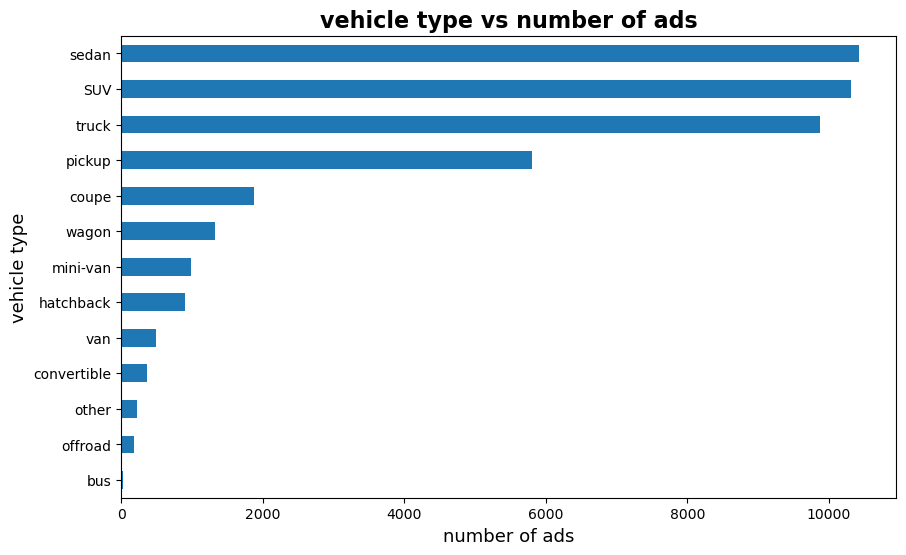

In [87]:
# Plot the bar chart to show the dependency of number of ads on the vehicle type
vehicle_type.sort_values(by = 'number of ads').plot.barh(
    x = 'vehicle type', y = 'number of ads', figsize = (10,6)
)

plt.title('vehicle type vs number of ads', fontsize = 16, fontweight = 'bold')
plt.legend().remove()
plt.xlabel('number of ads', fontsize = 13)
plt.ylabel('vehicle type', fontsize = 13)

plt.show()

As shown in the bar chart above, the `sedan` and the `SUV` types are the two most popular vehicle types to be used in the hypothesis testing. Therefore, the corresponding data for the `sedan` and `SUV` types will be created and stored in two seperatad dataframes. 

In [88]:
# Create the dataframe for sedan type
sedan_data = good_data.query('type == "sedan"').reset_index(drop=True)

# Look at the first 10 rows of sedan_data
sedan_data.head(10)

,price,odometer,vehicle_age,mileage_per_year,days_listed,cylinders,condition_score,paint_color,transmission,type
0,5500.0,110000.0,6.0,18333.333333,79,4,4,red,automatic,sedan
1,14900.0,80903.0,2.0,NaN,28,4,3,black,automatic,sedan
2,14990.0,57954.0,4.0,14488.500000,15,6,3,black,automatic,sedan
3,12990.0,79212.0,3.0,26404.000000,73,4,3,white,automatic,sedan
4,8990.0,111142.0,7.0,15877.428571,29,4,3,grey,automatic,sedan
5,16500.0,22104.0,1.0,22104.000000,29,4,3,silver,automatic,sedan
6,13990.0,31932.0,0.0,31932.000000,27,4,3,red,automatic,sedan
7,3950.0,128500.0,9.0,14277.777778,40,4,3,red,automatic,sedan
8,11499.0,39000.0,1.0,NaN,43,4,4,silver,automatic,sedan
9,8499.0,79523.0,4.0,19880.750000,23,4,4,red,automatic,sedan


In [89]:
# Create the dataframe for suv type
suv_data = good_data.query('type == "SUV"').reset_index(drop=True)

# Look at the first 10 rows of suv_data
suv_data.head(10)

,price,odometer,vehicle_age,mileage_per_year,days_listed,cylinders,condition_score,paint_color,transmission,type
0,9400.0,145000.0,7.0,20714.285714,19,6,2,black,automatic,SUV
1,15990.0,109473.0,6.0,18245.500000,68,6,3,black,automatic,SUV
2,11500.0,104174.0,6.0,17362.333333,19,4,3,silver,automatic,SUV
3,9200.0,147191.0,11.0,13381.000000,17,6,3,blue,automatic,SUV
4,12990.0,132285.0,10.0,13228.500000,24,8,3,black,automatic,SUV
5,13990.0,100669.0,4.0,25167.250000,25,6,3,red,automatic,SUV
6,12500.0,128325.0,6.0,21387.500000,13,6,3,white,automatic,SUV
7,6990.0,147485.0,8.0,18435.625000,28,8,3,silver,automatic,SUV
8,7500.0,167000.0,14.0,11928.571429,39,6,2,red,automatic,SUV
9,5000.0,137273.0,10.0,13727.300000,14,6,2,white,automatic,SUV


Ok, we are good to go for the hypothesis testing with the `sedan` and the `SUV` vehicle types.

[Back to Contents](#back)

## 5. Hypothesis Testing <a id='hypothesis_testing'></a>

### Hypothesis 1: The condition of a vehicle and the transmission type are the categorical factors which influence the price of a vehicle. <a id='hypothesis_1'></a>

To test this hypothesis, a boxplot will be plotted to evaluate whether the prices across the categories in a categorical variable vary significantly. However, those categories with less than 50 advertisements will not be included in the analysis. A function will be created to find the main categories in each categorical variable. To plot the boxplots for the main categories, another function will be created since we have to perform same procedure for the two most popular vehicle types.

In [90]:
# Create a function to find the main categories in the categorical columns
def find_main_categories(data, categorical_columns):
    for col in data:
        if col in categorical_columns:
            # find the categories with more than 50 ads
            category_counts = data[col].value_counts()
            main_category = category_counts[category_counts >= 50].index
            
            # assign the categories with less than 50 ads as 'others'
            data[col] = data[col].where(data[col].isin(main_category), 'others')
        else:
            pass

In [91]:
# Create a function to plot the boxplots for the categorical factors
def categorical_factor_plot(vehicle_data):    
    for col in vehicle_data:
        if col in categorical_columns:
            #plot for all categories except 'others'
            plot_data = vehicle_data.query(f'{col} != "others"')
            
            bp = plot_data.boxplot(column = 'price', by = col, figsize = (10,4), return_type = 'dict')
            plt.suptitle(f'Price factor by {col}', fontsize = 16, fontweight = 'bold')
            plt.title('')
            plt.xlabel(col, fontsize = 13)
            plt.ylabel('price', fontsize = 13)               
            
            # Find the max and min medians in the categorical variable
            medians = [median.get_ydata()[0] for median in bp['price']['medians']]
            min_median = min(medians)
            max_median = max(medians)
            
            # Colour the max and min medians for better visualisation
            for median in bp['price']['medians']:
                if (median.get_ydata()[0] == max_median) or (median.get_ydata()[0] == min_median):
                    median.set(color = 'red')
            
            plt.show()           

**`sedan` type**

In [92]:
# Apply the function to find the main categories in the categorical columns
find_main_categories(sedan_data, categorical_columns)

# Have a look at the sedan_data
sedan_data

,price,odometer,vehicle_age,mileage_per_year,days_listed,cylinders,condition_score,paint_color,transmission,type
0,5500.0,110000.0,6.0,18333.333333,79,4,4,red,automatic,sedan
1,14900.0,80903.0,2.0,NaN,28,4,3,black,automatic,sedan
2,14990.0,57954.0,4.0,14488.500000,15,6,3,black,automatic,sedan
3,12990.0,79212.0,3.0,26404.000000,73,4,3,white,automatic,sedan
4,8990.0,111142.0,7.0,15877.428571,29,4,3,grey,automatic,sedan
...,...,...,...,...,...,...,...,...,...,...
10592,NaN,60664.0,8.0,7583.000000,39,4,3,blue,manual,sedan
10593,NaN,2196.0,0.0,2196.000000,38,10,3,custom,other,sedan
10594,NaN,215643.0,13.0,16587.923077,78,4,3,black,automatic,sedan
10595,NaN,2196.0,0.0,2196.000000,71,10,3,custom,other,sedan


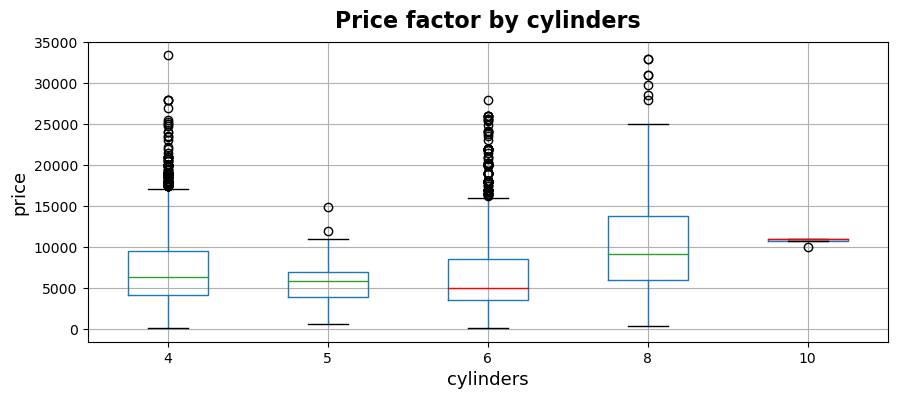

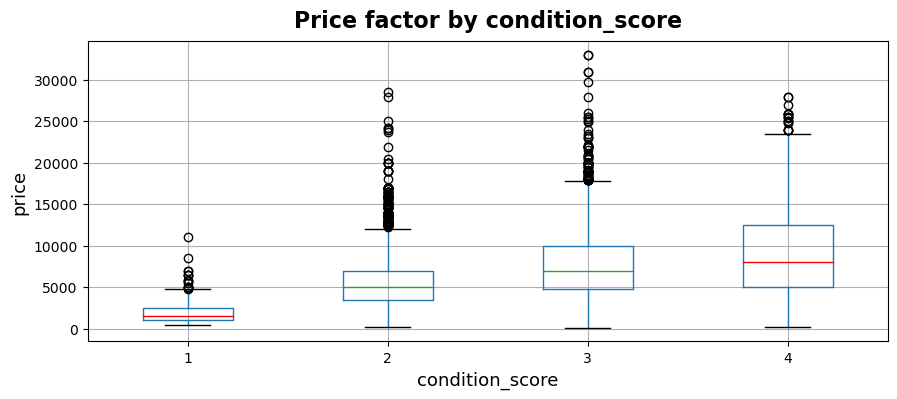

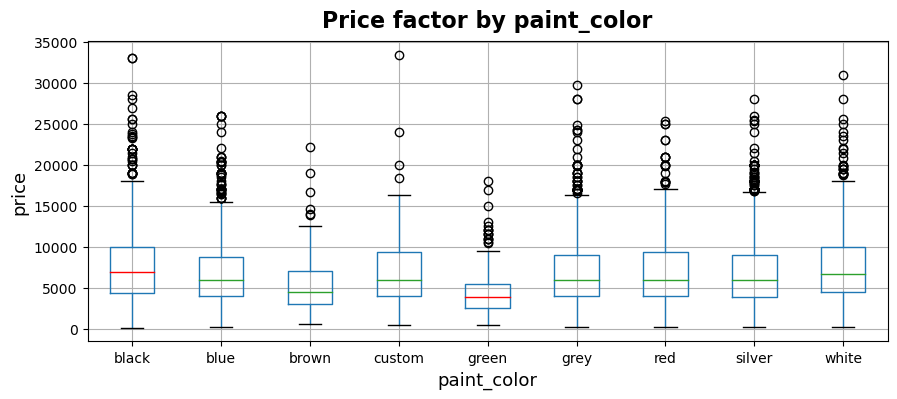

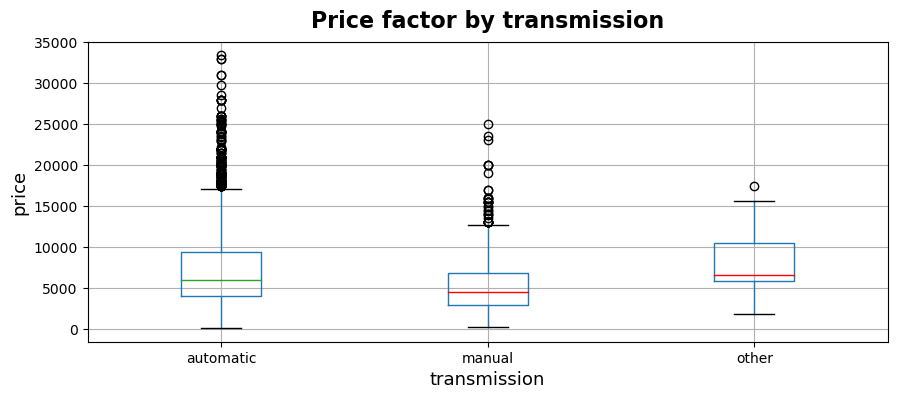

In [93]:
# Plot the categorical factors in the sedan data
categorical_factor_plot(sedan_data)

**Intermediate conclusion for `sedan` type**

The average price for `sedan` is 7039, we can use this value as a guideline to evaluate impact of each categorical variable on the price of `sedan`. 

1. `cylinders`: The median prices vary greatly from the lowest of 5000 (6 `cylinders` 1) to the highest of 11000 (10 `cylineders`). We also found that the median prices of 8 `cylinders` and 10 `cylinders` are significantly higher than the average price of 7039.
2. `condition_score`: The boxplot show that the `price` increases with the `condition_score`. The median prices vary considerably from the lowest of 2000 (`condition_score` 1) to the highest of 7500 (`condition_score` 4). Besides that, the lowest median price is much more lower than the average price.
3. `paint_color`: The median prices do not vary widely across the categories. All of the median prices are close to the average price except the `green` colour has a notably lower median prices than the average.
4. `transmission`: The median prices do not vary a lot across the categories. The median price of `manual` transmission type is the lowest among the three categories.

Above result shows that the `cylinders` and the `condition_score` are the two categorical variables which influence the price of `sedan` type vehicle.

**`SUV` type**

In [94]:
# Apply the function to find the main categories in the categorical columns
find_main_categories(suv_data, categorical_columns)

# Have a look at the suv_data
suv_data

,price,odometer,vehicle_age,mileage_per_year,days_listed,cylinders,condition_score,paint_color,transmission,type
0,9400.0,145000.0,7.0,20714.285714,19,6,2,black,automatic,SUV
1,15990.0,109473.0,6.0,18245.500000,68,6,3,black,automatic,SUV
2,11500.0,104174.0,6.0,17362.333333,19,4,3,silver,automatic,SUV
3,9200.0,147191.0,11.0,13381.000000,17,6,3,blue,automatic,SUV
4,12990.0,132285.0,10.0,13228.500000,24,8,3,black,automatic,SUV
...,...,...,...,...,...,...,...,...,...,...
10819,NaN,23690.0,1.0,23690.000000,19,8,3,black,automatic,SUV
10820,NaN,40800.0,0.0,NaN,35,8,3,black,automatic,SUV
10821,NaN,4500.0,0.0,4500.000000,21,8,3,white,other,SUV
10822,NaN,28815.0,2.0,14407.500000,19,8,3,white,automatic,SUV


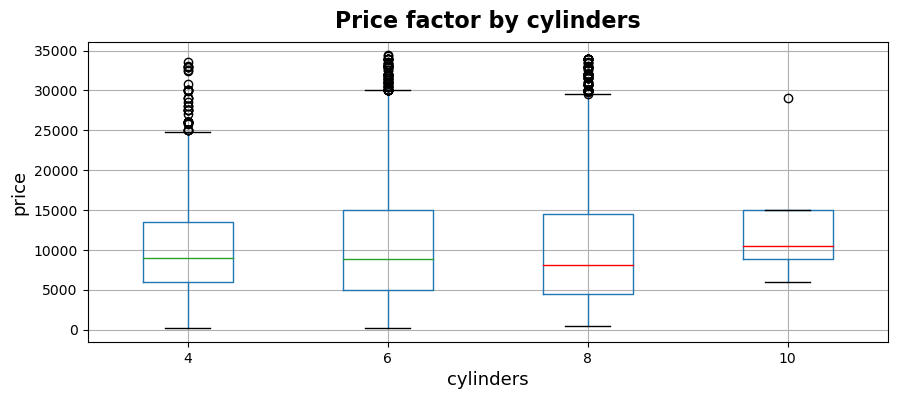

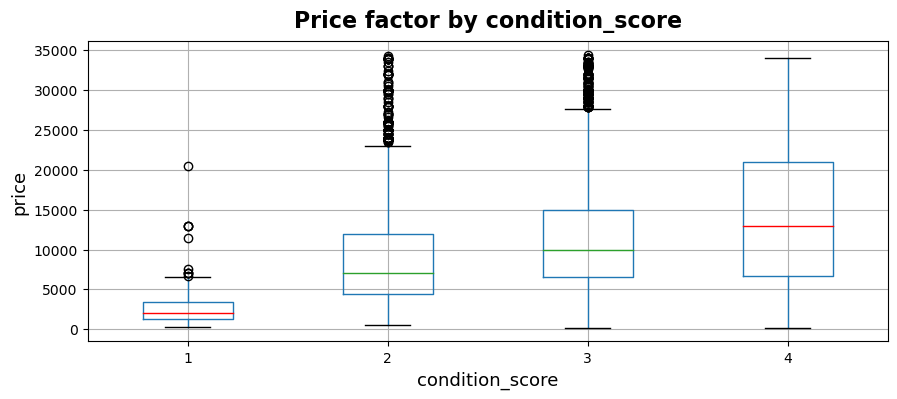

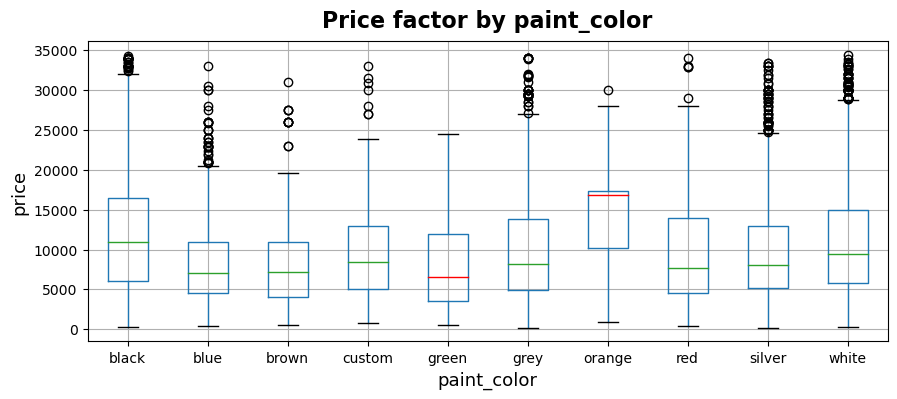

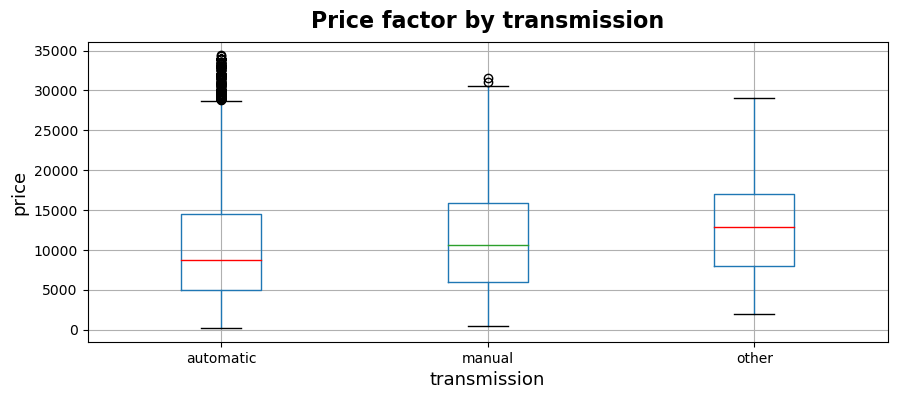

In [95]:
# Plot the categorical factors in the suv data
categorical_factor_plot(suv_data)

**Intermediate conclusion for `SUV` type**

The average price for `SUV` is 10551, we can use this value as a guideline to evaluate impact of each categorical variable on the price of `SUV`. 

1. `cylinders`: The median prices does not show substantial changes across the categories. All of the median prices are close to the average price.
2. `condition_score`: The boxplot show that the `price` increases with the `condition_score`. The median prices vary significantly from the lowest of 2000 (`condition_score` 1) to the highest of 13000 (`condition_score` 4). Besides that, the lowest median price is far more lower than the average price.
3. `paint_color`: The median prices vary by a large scale across the categories, from the lowest of 7000 (`green`) to the highest of 12000 (`orange`). All of the median prices are lower than the average price except the `orange` and the `black` colours.
4. `transmission`: The median prices do not vary greatly across the categories. The median price of `automatic` transmission type is the lowest among the three categories.

Above result shows that the `condition_score` and the `paint_color` are the two categorical variables which influence the price of `sedan` type vehicle.

**Conclusion**
1. The `sedan` vehicle type have `condition_score` and `cylinders` as the categorical factors which influence the price. 
2. The `SUV` vehicle type have `condition_score` and `paint_color` as the categorical factors which influence the price.

The hypothesis is partially accepted.

[Back to Contents](#back)

### Hypothesis 2: Both the odometer value and the vehicle's age are correlated with the price of a vehicle and there is a strong negative correlations between each of these two variables and the price. <a id='hypothesis_2'></a>

To test this hypothesis, a scatterplot and a scatter matrix will be plotted, a correlation matrix will also be calculated to evaluate the correlation between a numerical variable and the price of a vehicle. To plot the scatterplot, a function will be created since we have to perform same procedure for the two most popular vehicle types.

In [96]:
# Create a function to plot the scatterplot for the numerical factors
def numerical_factor_plot(vehicle_data):
    for col in vehicle_data:
        if (col in numerical_columns) and (col != 'price'):
            vehicle_data.plot(x = col, y = 'price', kind = 'scatter', figsize = (6,4))            
            
            plt.suptitle(f'Price factor by {col}', fontsize = 16, fontweight = 'bold')            
            plt.xlabel(col, fontsize = 13)
            plt.ylabel('price', fontsize = 13)   
            
            plt.show()   

**`sedan` type**

C:\Users\CHONG WEE\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


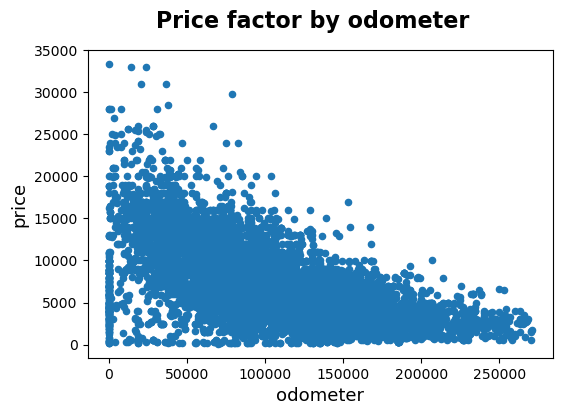

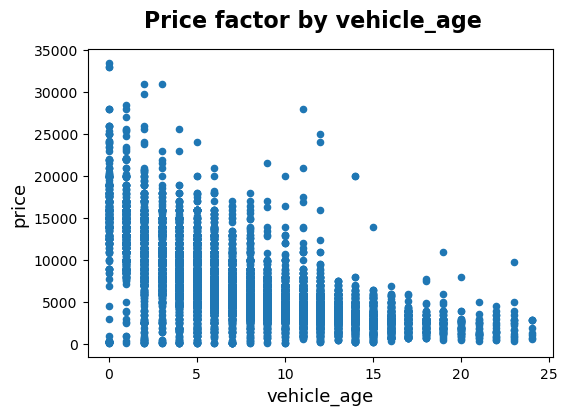

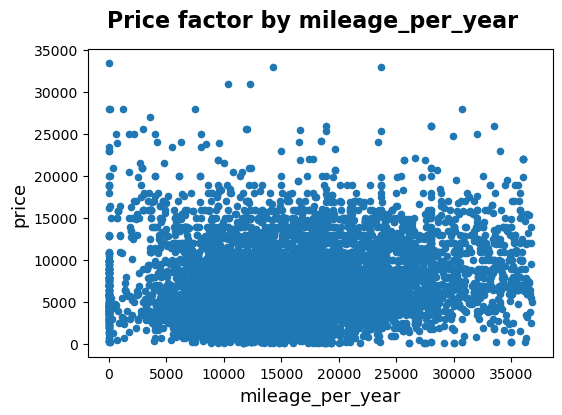

In [97]:
# Plot the numerical factors in the sedan data
numerical_factor_plot(sedan_data)

From the above scatterplots, it can be seen that `odometer` and `vehicle_are` are negatively correlated with the price of a `sedan` type vehicle. We will further confirm this result by plotting the scatter matrix and calculating the correlation matrix.

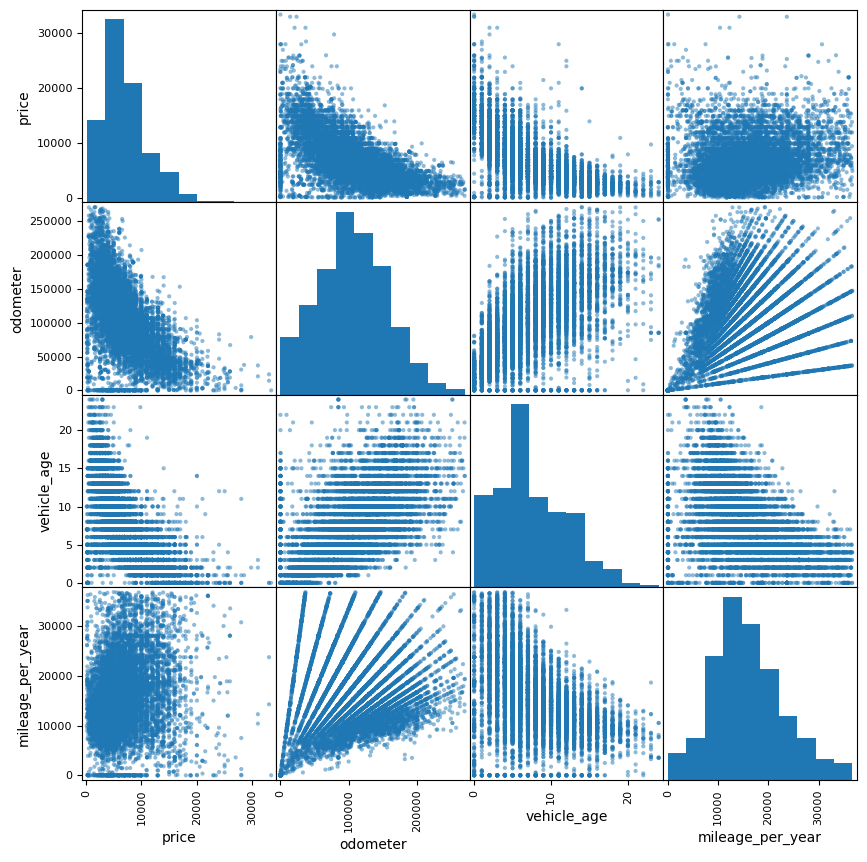

In [98]:
# Plot the scatter matrix for the numerical variables in the sedan data
pd.plotting.scatter_matrix(sedan_data[numerical_columns], figsize = (10,10));

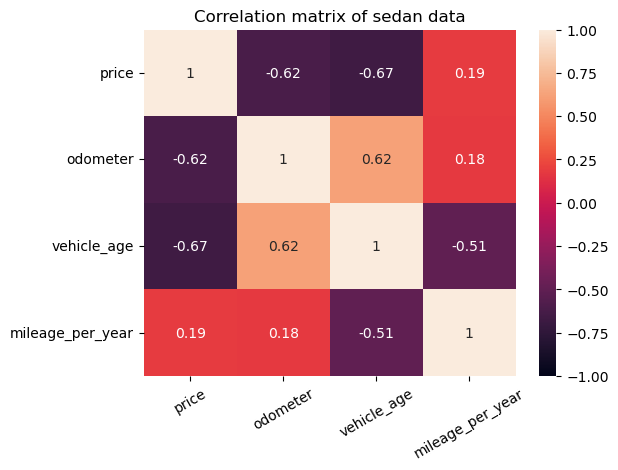

In [99]:
# Calculate the correlation matrix for the numerical variables in the sedan data
plt.figure(figsize = (6,4.5))

sns.heatmap(sedan_data[numerical_columns].corr(), 
            vmin = -1, vmax = 1, annot = True)

plt.title('Correlation matrix of sedan data')
plt.xticks(rotation = 30)

plt.show()

**Intermediate conclusion for `sedan` type**

From the above scatterplots, scatter matrix and correlation matrix, we can conclude that
1. The `odometer` and `price` show a negative correlation, the correlation coefficient of -0.62 is considerated as a moderate negative correlation.
2. The `vehicle_age` and `price` show a negative correlation, the correlation coefficient of -0.67 is considerated as a moderate negative correlation.
3. The `mileage_per_year` and `price`  show a very weak positive correlation which is counterintuitive since `mileage_per_year` is calculated from the `odometer` and `price`. This result does not mean that `mileage_per_year` and `price` have no relationship, the relationship could be non-linear.

**`SUV` type**

C:\Users\CHONG WEE\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


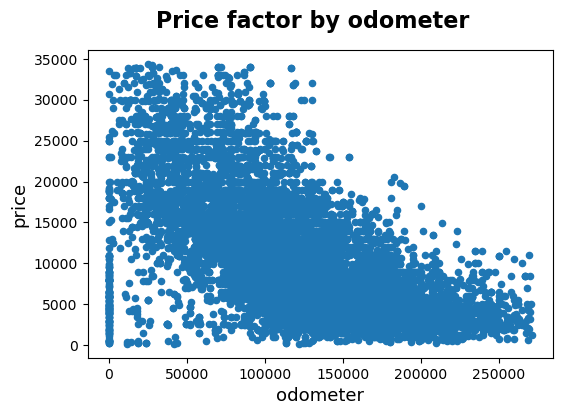

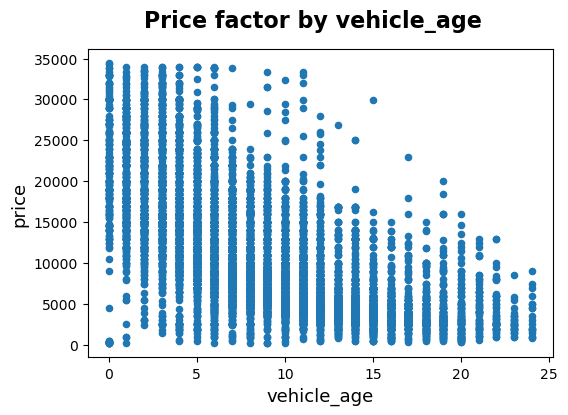

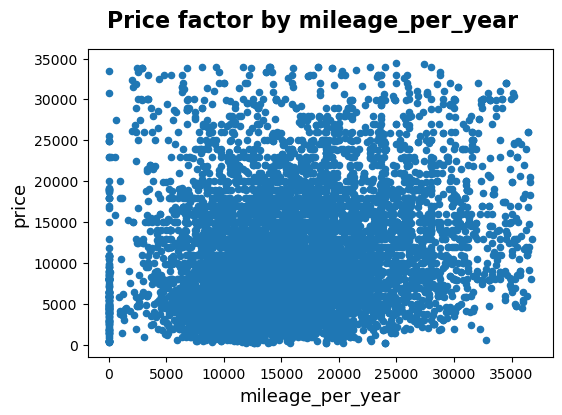

In [100]:
# Plot the numerical factors in the suv data
numerical_factor_plot(suv_data)

The above scatterplots indicate that `odometer` and `vehicle_are` are negatively correlated with the price of a `SUV` type vehicle. This result will be further investigated by plotting the scatter matrix and calculating the correlation matrix.

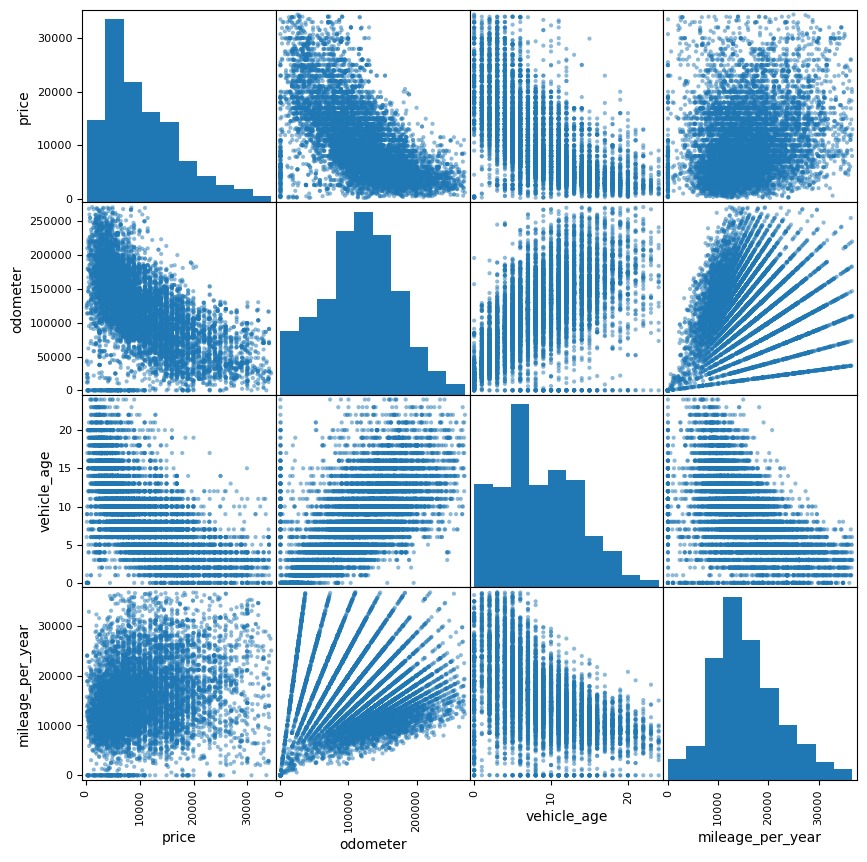

In [101]:
# Plot the scatter matrix for the numerical variables in the suv data
pd.plotting.scatter_matrix(suv_data[numerical_columns], figsize = (10,10));

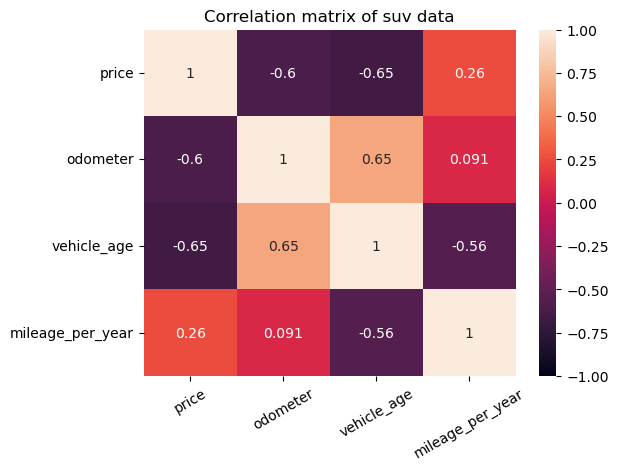

In [102]:
# Calculate the correlation matrix for the numerical variables in the sedan data
plt.figure(figsize = (6,4.5))

sns.heatmap(suv_data[numerical_columns].corr(), 
            vmin = -1, vmax = 1, annot = True)

plt.title('Correlation matrix of suv data')
plt.xticks(rotation = 30)

plt.show()

**Intermediate conclusion for `SUV` type**

From the above scatterplots, scatter matrix and correlation matrix, we can conclude that
1. The `odometer` and `price` show a negative correlation, the correlation coefficient of -0.61 is considerated as a moderate negative correlation.
2. The `vehicle_age` and `price` show a negative correlation, the correlation coefficient of -0.65 is considerated as a moderate negative correlation.
3. The `mileage_per_year` and `price`  show a weak positive correlation.

**Conclusion**
- The `odometer` and the `vehicle_age` are two numerical factors which influnece the price for both the `sedan` and `SUV` vehicle types. 
- There is a moderate negative correlation between `odometer` and `price` variables for both the `sedan` and `SUV` vehicle types. This implies that the higher the `odometer` reading, the lower the price.
- There is also a moderate negative correlation between `vehicle_age` and `price` variables for both the `sedan` and `SUV` vehicle types. This implies that the higher the `vehicle_age`, the lower the price.

The hypothesis is partially accepted.

[Back to Contents](#back)

## 6. General Conclusion <a id='general_conclusion'></a>
**Data Exploration**

In the original dataset, the `price`, `condition`, `cylinders`, `odometer`, `transmission`, `paint_color` and `date_posted` were identified to be used in answering the questions and testing the hypotheses related to price factors of a vehicle. However,there were quite a few problematic issues in the dataset needed to be addressed.

**Data Cleaning**

1. Missing values
- `is_4wd`: Filling all the missing values with `0` since there are no `0` in the column.
- `cylinders` and `paint_color`: Using `model` as the dependent variable to find the corresponding mode to fill the missing values.
- `odometer`: Using `model_year` and `condition` as the dependent variables to find the corresponding medians to fill the missing values.
- `model_year`: Using `model` and `condition` as the dependent variables to find the corresponding medians to fill the missing values.

2. Fixing data types
- Changing the data types of `model_year`, `cylinders`, `odometer` and `is_4wd` to `int64`.
- Changing the data type of `date_posted` to `datetime`.

3. Enrichment of data - The following information was added to facilate the analysis process in the later stage.
- The values of `year`, `month`, and `day of week` when the advertisement was placed.
- The `vehicle's age` in years when the advertisement was placed and the data type was changed to `int64`.
- The `vechicle's average mileage per year`.
- The `condition_score`.

**Exploratory Data Analysis**

In this stage, the outliers and anomalies were treated as stated as below.
- Bar charts were plotted for categorical variables - `cylinders`, `condition_score`, `paint_color` and `transmission`. All of the variables have majority categories and minority categories. The majority categories are used to determine the price factor of a vehicle and the minority categories are excluded from the hypothesis testing.
- The values from `0` to `100` in the `price` column were treated as anomalies and these values were reassigned as `NaN`
- Histograms were plotted for the numerical variables - `price`, `odometer`, `vehicle_age` and `mileage_per_year`. The readability of these histograms from the original dataset is poor due to the outliers. After the removal of outliers, the readability of the histograms increases significantly. A `good_data` dataframe was created with these numerical columns without outliers.

Before testing the hypothesis, we found the typical lifetime of advertisements to be 10 to 100 days and these values were used to slice the `good_data`. Then, the categorical columns and `type` column were also added to the `good_data`. We analysed the average price and the number of advertisements of each vehicle type and decided to use the two most popular vehicle types (`sedan` and `SUV`) to continue with the hypothesis testing.


**Hypothesis testing**

This report aims to answer the following questions:
1. Among the categorical variables (number of cylinders, condition, paint colour and transmission type), which of them will influence the price of a vehicle?
2. Is there any correlation between the numerical variable (odometer value and vehicle's age) and the price of a vehicle?

Two relevant hypotheses have been tested:
1. The condition of a vehicle and the transmission type are the categorical factors which influence the price of a vehicle.
2. Both the odometer value and the vehicle's age are correlated with the price of a vehicle and there is a strong negative correlations between each of these two variables and the price.

After analysing the data, we concluded that

1. The `sedan` vehicle type have `condition_score` and `cylinders` as the categorical factors which influence the price. 
2. The `SUV` vehicle type have `condition_score` and `paint_color` as the categorical factors which influence the price.

The first hypothesis is partially accepted.

3. The `odometer` and the `vehicle_age` are two numerical factors which influnece the price for both the `sedan` and `SUV` vehicle types. 
4. There is a moderate negative correlation between `odometer` and `price` variables for both the `sedan` and `SUV` vehicle types.
5. There is also a moderate negative correlation between `vehicle_age` and `price` variables for both the `sedan` and `SUV` vehicle types.

The second hypothesis is partially accepted. 

[Back to Contents](#back)